# Chapter 10 Data visualization principles

We have already provided some rules to follow as we created plots for our examples. Here, we aim to provide some general principles we can use as a guide for effective data visualization. Much of this section is based on a talk by Karl Broman titled “Creating Effective Figures and Tables" and includes some of the figures which were made with code that Karl makes available on his GitHub repository, as well as class notes from Peter Aldhous’"Introduction to Data Visualization course". Following Karl’s approach, we show some examples of plot styles we should avoid, explain how to improve them, and use these as motivation for a list of principles. We compare and contrast plots that follow these principles to those that don’t.

The principles are mostly based on research related to how humans detect patterns and make visual comparisons. The preferred approaches are those that best fit the way our brains process visual information. When deciding on a visualization approach, it is also important to keep our goal in mind. We may be comparing a viewable number of quantities, describing distributions for categories or numeric values, comparing the data from two groups, or describing the relationship between two variables. As a final note, we want to emphasize that for a data scientist it is important to adapt and optimize graphs to the audience. For example, an exploratory plot made for ourselves will be different than a chart intended to communicate a finding to a general audience.

We will be using these libraries:

In [1]:
library(tidyverse)
library(dslabs)
library(gridExtra)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

√ ggplot2 3.3.2     √ purrr   0.3.4
√ tibble  3.0.3     √ dplyr   1.0.2
√ tidyr   1.1.2     √ stringr 1.4.0
√ readr   1.3.1     √ forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




## 10.1 Encoding data using visual cues

We start by describing some principles for encoding data. There are several approaches at our disposal including position, aligned lengths, angles, area, brightness, and color hue.

To illustrate how some of these strategies compare, let’s suppose we want to report the results from two hypothetical polls regarding browser preference taken in 2000 and then 2015. For each year, we are simply comparing five quantities – the five percentages. A widely used graphical representation of percentages, popularized by Microsoft Excel, is the pie chart:
![](https://rafalab.github.io/dsbook/book_files/figure-html/piechart-1.png)

Here we are representing quantities with both areas and angles, since both the angle and area of each pie slice are proportional to the quantity the slice represents. This turns out to be a sub-optimal choice since, as demonstrated by perception studies, humans are not good at precisely quantifying angles and are even worse when area is the only available visual cue. The donut chart is an example of a plot that uses only area:

![](https://rafalab.github.io/dsbook/book_files/figure-html/donutchart-1.png)

To see how hard it is to quantify angles and area, note that the rankings and all the percentages in the plots above changed from 2000 to 2015. Can you determine the actual percentages and rank the browsers’ popularity? Can you see how the percentages changed from 2000 to 2015? It is not easy to tell from the plot. In fact, the `pie` R function help file states that:

    Pie charts are a very bad way of displaying information. The eye is good at judging linear measures and bad at judging relative areas. A bar chart or dot chart is a preferable way of displaying this type of data.

In this case, simply showing the numbers is not only clearer, but would also save on printing costs if printing a paper copy:

|Browser|	2000|	2015|
|-|-|-|
|Opera|	3|	2|
|Safari|	21|	22|
|Firefox|	23|	21|
|Chrome|	26|	29|
|IE|	28|	27|

The preferred way to plot these quantities is to use length and position as visual cues, since humans are much better at judging linear measures. The barplot uses this approach by using bars of length proportional to the quantities of interest. By adding horizontal lines at strategically chosen values, in this case at every multiple of 10, we ease the visual burden of quantifying through the position of the top of the bars. Compare and contrast the information we can extract from the two figures.

![](https://rafalab.github.io/dsbook/book_files/figure-html/two-barplots-1.png)

Notice how much easier it is to see the differences in the barplot. In fact, we can now determine the actual percentages by following a horizontal line to the x-axis.

If for some reason you need to make a pie chart, label each pie slice with its respective percentage so viewers do not have to infer them from the angles or area:
![](https://rafalab.github.io/dsbook/book_files/figure-html/excel-barplot-1.png)

In general, when displaying quantities, position and length are preferred over angles and/or area. Brightness and color are even harder to quantify than angles. But, as we will see later, they are sometimes useful when more than two dimensions must be displayed at once.

<br/><br/>
## 10.2 Know when to include 0

When using barplots, it is misinformative not to start the bars at 0. This is because, by using a barplot, we are implying the length is proportional to the quantities being displayed. By avoiding 0, relatively small differences can be made to look much bigger than they actually are. This approach is often used by politicians or media organizations trying to exaggerate a difference. Below is an illustrative example used by Peter Aldhous in this lecture: http://paldhous.github.io/ucb/2016/dataviz/week2.html.

![](https://rafalab.github.io/dsbook/dataviz/img/class2_8.jpg)
(Source: Fox News, via Media Matters)

From the plot above, it appears that apprehensions have almost tripled when, in fact, they have only increased by about 16%. Starting the graph at 0 illustrates this clearly:

![](https://rafalab.github.io/dsbook/book_files/figure-html/barplot-from-zero-1-1.png)

Here is another example, described in detail in a Flowing Data blog post:

![](https://rafalab.github.io/dsbook/dataviz/img/Bush-cuts.png)
(Source: Fox News, via Flowing Data.)

This plot makes a 13% increase look like a five fold change. Here is the appropriate plot:

![](https://rafalab.github.io/dsbook/book_files/figure-html/barplot-from-zero-2-1.png)

Finally, here is an extreme example that makes a very small difference of under 2% look like a 10-100 fold change:

![](https://rafalab.github.io/dsbook/dataviz/img/venezuela-election.png)
(Source: Venezolana de Televisión via Pakistan Today and Diego Mariano.)

Here is the appropriate plot:

![](https://rafalab.github.io/dsbook/book_files/figure-html/barplot-from-zero-3-1.png)

When using position rather than length, it is then not necessary to include 0. This is particularly the case when we want to compare differences between groups relative to the within-group variability. Here is an illustrative example showing country average life expectancy stratified across continents in 2012:

![](https://rafalab.github.io/dsbook/book_files/figure-html/points-plot-not-from-zero-1.png)

Note that in the plot on the left, which includes 0, the space between 0 and 43 adds no information and makes it harder to compare the between and within group variability.

<br/><br/>
## 10.3 Do not distort quantities

During President Barack Obama’s 2011 State of the Union Address, the following chart was used to compare the US GDP to the GDP of four competing nations:

![](https://rafalab.github.io/dsbook/dataviz/img/state-of-the-union.png)
(Source: The 2011 State of the Union Address)

Judging by the area of the circles, the US appears to have an economy over five times larger than China’s and over 30 times larger than France’s. However, if we look at the actual numbers, we see that this is not the case. The actual ratios are 2.6 and 5.8 times bigger than China and France, respectively. The reason for this distortion is that the radius, rather than the area, was made to be proportional to the quantity, which implies that the proportion between the areas is squared: 2.6 turns into 6.5 and 5.8 turns into 34.1. Here is a comparison of the circles we get if we make the value proportional to the radius and to the area:

![](https://rafalab.github.io/dsbook/book_files/figure-html/area-not-radius-1.png)

Not surprisingly, __ggplot2__ defaults to using area rather than radius. Of course, in this case, we really should not be using area at all since we can use position and length:

![](https://rafalab.github.io/dsbook/book_files/figure-html/barplot-better-than-area-1.png)

## 10.4 Order categories by a meaningful value

When one of the axes is used to show categories, as is done in barplots, the default __ggplot2__ behavior is to order the categories alphabetically when they are defined by character strings. If they are defined by factors, they are ordered by the factor levels. We rarely want to use alphabetical order. Instead, we should order by a meaningful quantity. In all the cases above, the barplots were ordered by the values being displayed. The exception was the graph showing barplots comparing browsers. In this case, we kept the order the same across the barplots to ease the comparison. Specifically, instead of ordering the browsers separately in the two years, we ordered both years by the average value of 2000 and 2015.

We previously learned how to use the reorder function, which helps us achieve this goal. To appreciate how the right order can help convey a message, suppose we want to create a plot to compare the murder rate across states. We are particularly interested in the most dangerous and safest states. Note the difference when we order alphabetically (the default) versus when we order by the actual rate:

 ![](https://rafalab.github.io/dsbook/book_files/figure-html/do-not-order-alphabetically-1.png)

We can make the second plot like this:

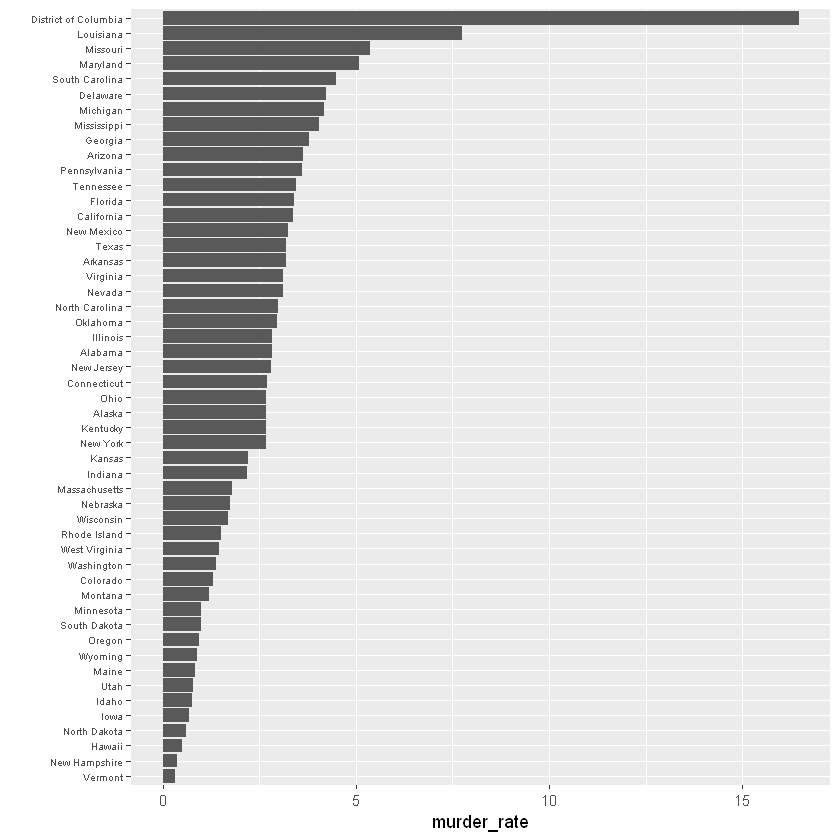

In [5]:
data(murders)
murders %>% mutate(murder_rate = total /population * 10^5) %>%
    mutate(state = reorder(state, murder_rate)) %>%
    ggplot(aes(state, murder_rate)) +
    geom_bar(stat = "identity") +
    coord_flip() +
    theme(axis.text.y = element_text(size = 6)) +
    xlab("")
    

    

The `reorder` function lets us reorder groups as well. Earlier we saw an example related to income distributions across regions. Here are the two versions plotted against each other:

![](https://rafalab.github.io/dsbook/book_files/figure-html/reorder-boxplot-example-1.png)

The first orders the regions alphabetically, while the second orders them by the group’s median.

<br/><br/>
## 10.5 Show the data

We have focused on displaying single quantities across categories. We now shift our attention to displaying data, with a focus on comparing groups.

To motivate our first principle, “show the data”, we go back to our artificial example of describing heights to ET, an extraterrestrial. This time let’s assume ET is interested in the difference in heights between males and females. A commonly seen plot used for comparisons between groups, popularized by software such as Microsoft Excel, is the dynamite plot, which shows the average and standard errors (standard errors are defined in a later chapter, but do not confuse them with the standard deviation of the data). The plot looks like this:

![](https://rafalab.github.io/dsbook/book_files/figure-html/show-data-1-1.png)

The average of each group is represented by the top of each bar and the antennae extend out from the average to the average plus two standard errors. If all ET receives is this plot, he will have little information on what to expect if he meets a group of human males and females. The bars go to 0: does this mean there are tiny humans measuring less than one foot? Are all males taller than the tallest females? Is there a range of heights? ET can’t answer these questions since we have provided almost no information on the height distribution.

This brings us to our first principle: show the data. This simple ggplot2 code already generates a more informative plot than the barplot by simply showing all the data points:

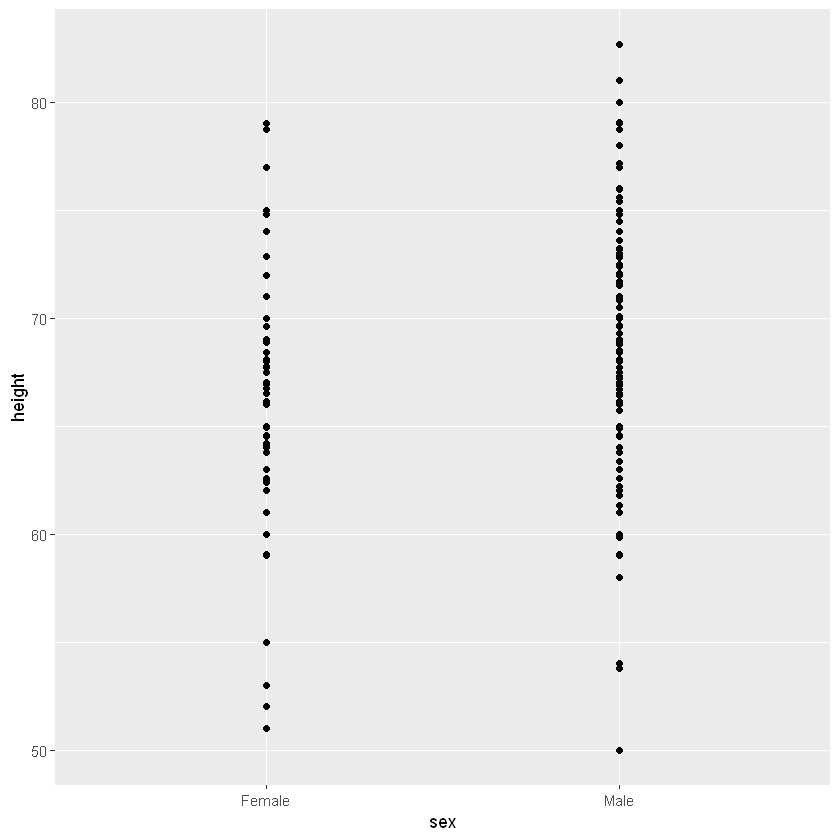

In [8]:
data(heights)
heights %>%
    ggplot(aes(sex, height)) +
    geom_point()

For example, this plot gives us an idea of the range of the data. However, this plot has limitations as well, since we can’t really see all the 238 and 812 points plotted for females and males, respectively, and many points are plotted on top of each other. As we have previously described, visualizing the distribution is much more informative. But before doing this, we point out two ways we can improve a plot showing all the points.

The first is to add _jitter_ , which adds a small random shift to each point. In this case, adding horizontal jitter does not alter the interpretation, since the point heights do not change, but we minimize the number of points that fall on top of each other and, therefore, get a better visual sense of how the data is distributed. A second improvement comes from using _alpha blending_ : making the points somewhat transparent. The more points fall on top of each other, the darker the plot, which also helps us get a sense of how the points are distributed. Here is the same plot with jitter and alpha blending:

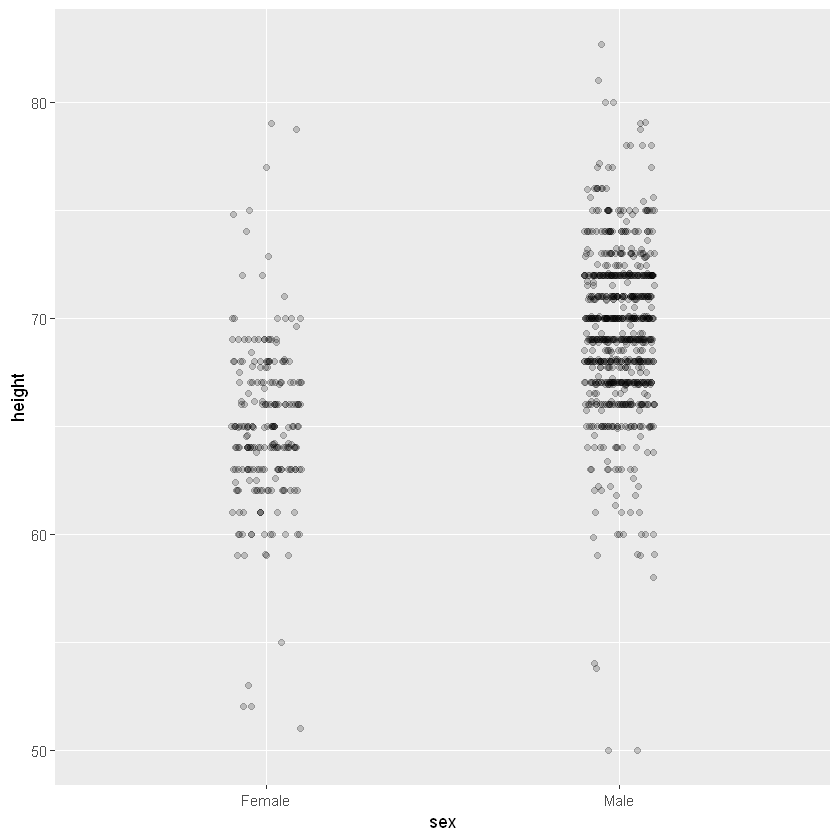

In [7]:
data(heights)
heights %>%
    ggplot(aes(sex, height)) +
    geom_jitter(width = 0.1, alpha = 0.2)

Now we start getting a sense that, on average, males are taller than females. We also note dark horizontal bands of points, demonstrating that many report values that are rounded to the nearest integer.

<br/><br/>
## 10.6 Ease comparisons
<br/><br/>
### 10.6.1 Use common axes

Since there are so many points, it is more effective to show distributions rather than individual points. We therefore show histograms for each group:

![](https://rafalab.github.io/dsbook/book_files/figure-html/common-axes-histograms-wrong-1.png)

However, from this plot it is not immediately obvious that males are, on average, taller than females. We have to look carefully to notice that the x-axis has a higher range of values in the male histogram. An important principle here is to __keep the axes the same__ when comparing data across two plots. Below we see how the comparison becomes easier:

![](https://rafalab.github.io/dsbook/book_files/figure-html/common-axes-histograms-right-1.png)

<br/><br/>
### 10.6.2 Align plots vertically to see horizontal changes and horizontally to see vertical changes

In these histograms, the visual cue related to decreases or increases in height are shifts to the left or right, respectively: horizontal changes. Aligning the plots vertically helps us see this change when the axes are fixed:

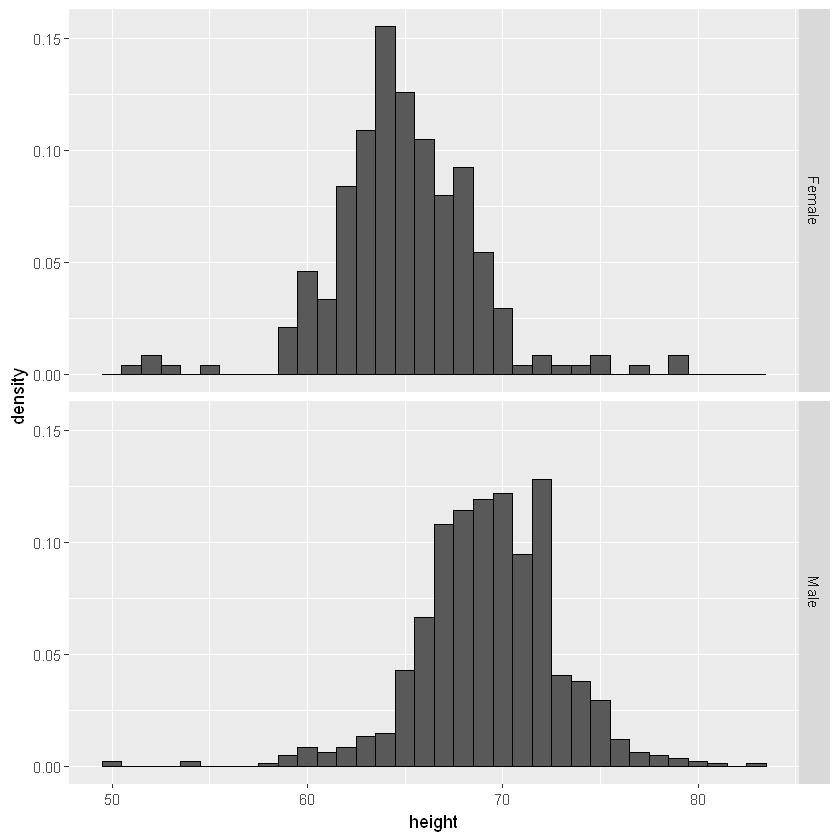

In [10]:
heights %>%
    ggplot(aes(height, ..density..)) +
    geom_histogram(binwidth = 1, color = "black") +
    facet_grid(sex~.)

This plot makes it much easier to notice that men are, on average, taller.

If , we want the more compact summary provided by boxplots, we then align them horizontally since, by default, boxplots move up and down with changes in height. Following our show the data principle, we then overlay all the data points:

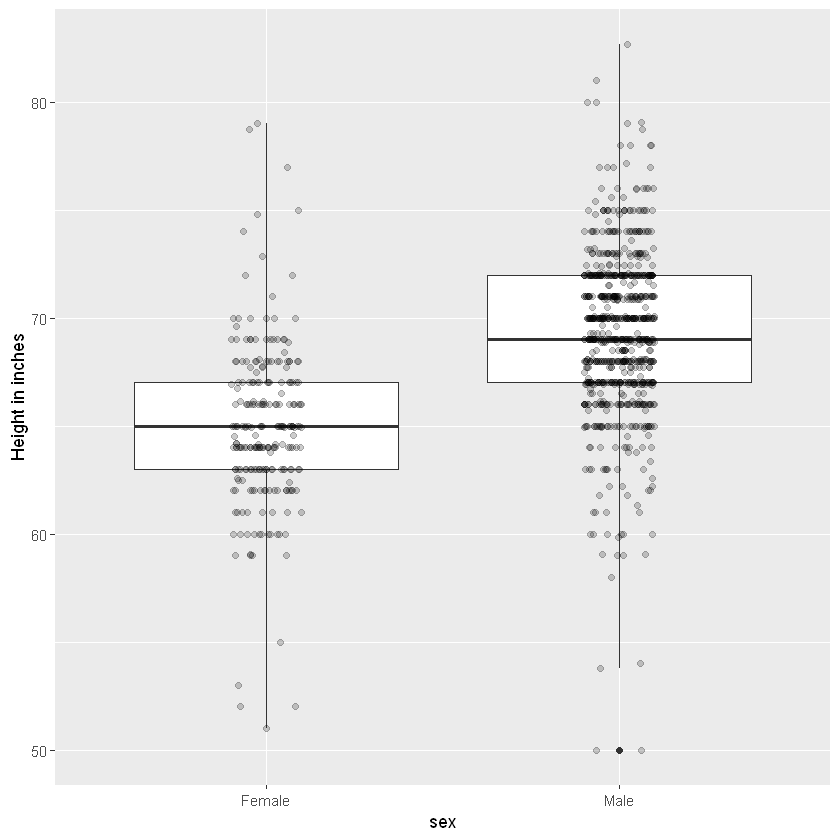

In [11]:
heights %>%
    ggplot(aes(sex, height)) +
    geom_boxplot(coef = 3) +
    geom_jitter(width = 0.1, alpha = 0.2) +
    ylab("Height in inches")

Now contrast and compare these three plots, based on exactly the same data:

![](https://rafalab.github.io/dsbook/book_files/figure-html/show-the-data-comparison-1.png)

Notice how much more we learn from the two plots on the right. Barplots are useful for showing one number, but not very useful when we want to describe distributions.

<br/><br/>
### 10.6.3 Consider transformations

We have motivated the use of the log transformation in cases where the changes are multiplicative. Population size was an example in which we found a log transformation to yield a more informative transformation.

The combination of an incorrectly chosen barplot and a failure to use a log transformation when one is merited can be particularly distorting. As an example, consider this barplot showing the average population sizes for each continent in 2015:

![](https://rafalab.github.io/dsbook/book_files/figure-html/no-transformations-wrong-use-of-barplot-1.png)

From this plot, one would conclude that countries in Asia are much more populous than in other continents. Following the _show the data_ principle, we quickly notice that this is due to two very large countries, which we assume are India and China:

![](https://rafalab.github.io/dsbook/book_files/figure-html/no-transformation-1.png)

Using a log transformation here provides a much more informative plot. We compare the original barplot to a boxplot using the log scale transformation for the y-axis:

![](https://rafalab.github.io/dsbook/book_files/figure-html/correct-transformation-1.png)

With the new plot, we realize that countries in Africa actually have a larger median population size than those in Asia.

Other transformations you should consider are the logistic transformation (`logit`), useful to better see fold changes in odds, and the square root transformation (`sqrt`), useful for count data.
<br/><br/>
### 10.6.4 Visual cues to be compared should be adjacent

For each continent, let’s compare income in 1970 versus 2010. When comparing income data across regions between 1970 and 2010, we made a figure similar to the one below, but this time we investigate continents rather than regions.

![](https://rafalab.github.io/dsbook/book_files/figure-html/boxplots-not-adjacent-1.png)

The default in ggplot2 is to order labels alphabetically so the labels with 1970 come before the labels with 2010, making the comparisons challenging because a continent’s distribution in 1970 is visually far from its distribution in 2010. It is much easier to make the comparison between 1970 and 2010 for each continent when the boxplots for that continent are next to each other:

![](https://rafalab.github.io/dsbook/book_files/figure-html/boxplot-adjacent-comps-1.png)

<br/><br/>
### 10.6.5 Use color

The comparison becomes even easier to make if we use color to denote the two things we want to compare:

![](https://rafalab.github.io/dsbook/book_files/figure-html/boxplot-adjacent-comps-with-color-1.png)

<br/><br/>
## 10.7 Think of the color blind

About 10% of the population is color blind. Unfortunately, the default colors used in ggplot2 are not optimal for this group. However, ggplot2 does make it easy to change the color palette used in the plots. An example of how we can use a color blind friendly palette is described here: http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/#a-colorblind-friendly-palette:

In [14]:
color_blind_friendly_cols <- c("#999999", "#E69F00", "#56B4E9", "#009E73", 
    "#F0E442", "#0072B2", "#D55E00", "#CC79A7")


Here are the colors

![](https://rafalab.github.io/dsbook/book_files/figure-html/color-blind-friendly-colors-1.png)

There are several resources that can help you select colors, for example this one: http://bconnelly.net/2013/10/creating-colorblind-friendly-figures/.

<br/><br/>
## 10.8 Plots for two variables

In general, you should use scatterplots to visualize the relationship between two variables. In every single instance in which we have examined the relationship between two variables, including total murders versus population size, life expectancy versus fertility rates, and infant mortality versus income, we have used scatterplots. This is the plot we generally recommend. However, there are some exceptions and we describe two alternative plots here: the _slope chart_ and the _Bland-Altman plot_.
<br/><br/>
### 10.8.1 Slope charts

One exception where another type of plot may be more informative is when you are comparing variables of the same type, but at different time points and for a relatively small number of comparisons. For example, comparing life expectancy between 2010 and 2015. In this case, we might recommend a _slope chart_.

There is no geometry for slope charts in __ggplot2__, but we can construct one using `geom_line`. We need to do some tinkering to add labels. Below is an example comparing 2010 to 2015 for large western countries:

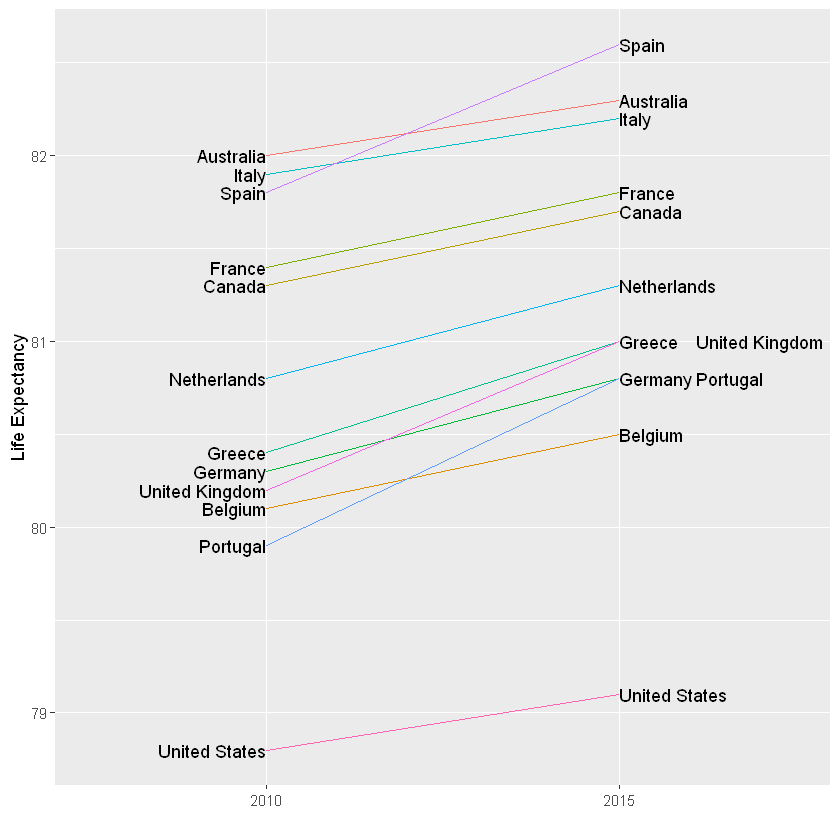

In [17]:
west <- c("Western Europe","Northern Europe","Southern Europe",
          "Northern America","Australia and New Zealand")

data(gapminder)
dat <- gapminder %>%
    filter(year%in% c(2010, 2015) & region %in% west & !is.na(life_expectancy) & population > 10^7)

dat %>%
    mutate(location = ifelse(year == 2010, 1, 2),
           location = ifelse(year == 2015 &
                                country %in% c("United Kingdom", "Portugal"),
                                location + 0.22, location),
            hjust = ifelse(year == 2010, 1, 0)) %>%
    mutate(year = as.factor(year)) %>%
    ggplot(aes(year, life_expectancy, group = country)) +
    geom_line(aes(color = country), show.legend = FALSE) +
    geom_text(aes(x = location, label = country, hjust = hjust),
                show.legend = FALSE) +
    xlab("") + ylab("Life Expectancy")

An advantage of the slope chart is that it permits us to quickly get an idea of changes based on the slope of the lines. Although we are using angle as the visual cue, we also have position to determine the exact values. Comparing the improvements is a bit harder with a scatterplot:

![](https://rafalab.github.io/dsbook/book_files/figure-html/scatter-plot-instead-of-slope-1.png)

In the scatterplot, we have followed the principle use common axes since we are comparing these before and after. However, if we have many points, slope charts stop being useful as it becomes hard to see all the lines.
<br/><br/>
### 10.8.2 Bland-Altman plot

Since we are primarily interested in the difference, it makes sense to dedicate one of our axes to it. The Bland-Altman plot, also known as the Tukey mean-difference plot and the MA-plot, shows the difference versus the average:

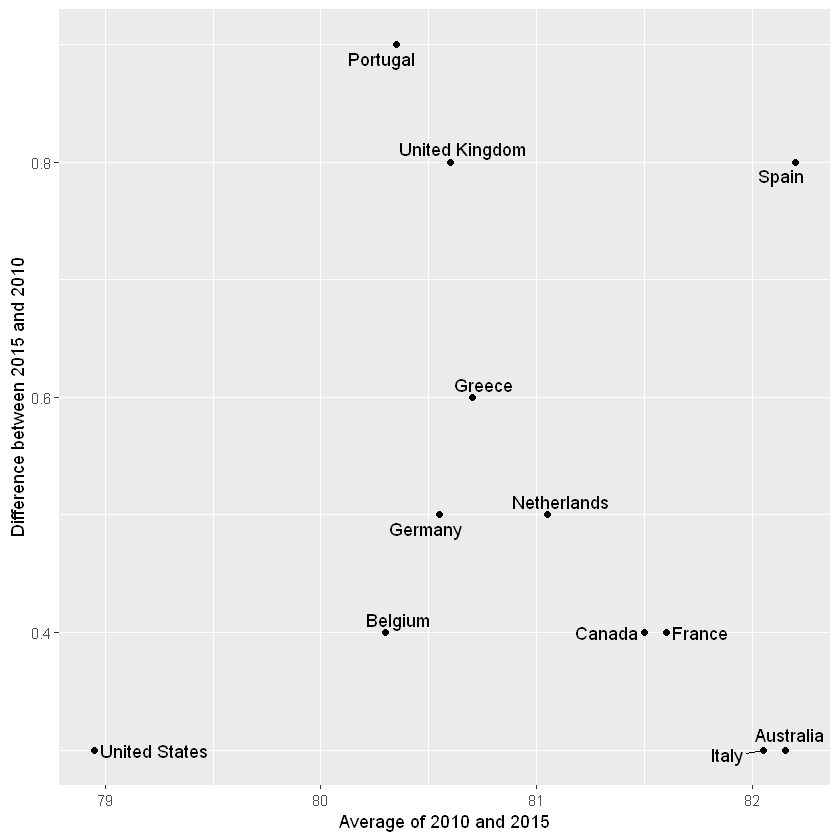

In [24]:
library(ggrepel)
dat %>%
    mutate(year = paste0("life_expectancy_", year))%>%
   select(country, year, life_expectancy) %>%
    spread(year, life_expectancy) %>%# 앞에꺼를 colume 그다음에 뒤에꺼의 정보를 column에 들어갈 vector를 아래로 나열
    mutate(average = (life_expectancy_2015 + life_expectancy_2010)/2,
            difference = life_expectancy_2015 - life_expectancy_2010) %>%
    ggplot(aes(average, difference, label = country)) +
    geom_point() +
    geom_text_repel() +
    geom_abline(lty = 2) +
    xlab("Average of 2010 and 2015") + 
    ylab("Difference between 2015 and 2010")
    
    

Here, by simply looking at the y-axis, we quickly see which countries have shown the most improvement. We also get an idea of the overall value from the x-axis.

<br/><br/>
## 10.9 Encoding a third variable

An earlier scatterplot showed the relationship between infant survival and average income. Below is a version of this plot that encodes three variables: OPEC membership, region, and population.

![](https://rafalab.github.io/dsbook/book_files/figure-html/encoding-third-variable-1.png)

We encode categorical variables with color and shape. These shapes can be controlled with `shape` argument. Below are the shapes available for use in R. For the last five, the color goes inside.

![](https://rafalab.github.io/dsbook/book_files/figure-html/available-shapes-1.png)

For continuous variables, we can use color, intensity, or size. We now show an example of how we do this with a case study.

When selecting colors to quantify a numeric variable, we choose between two options: sequential and diverging. Sequential colors are suited for data that goes from high to low. High values are clearly distinguished from low values. Here are some examples offered by the package `RColorBrewer`:

Warning message:
"package 'RColorBrewer' is in use and will not be installed"


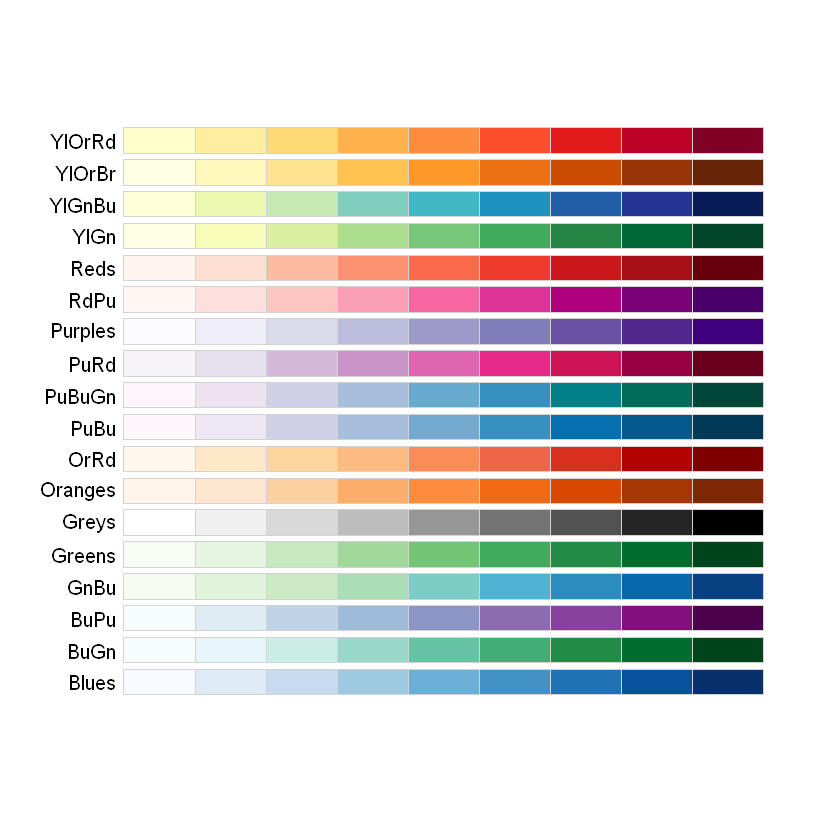

In [28]:
install.packages("RColorBrewer")
library(RColorBrewer)
display.brewer.all(type="seq")

Diverging colors are used to represent values that diverge from a center. We put equal emphasis on both ends of the data range: higher than the center and lower than the center. An example of when we would use a divergent pattern would be if we were to show height in standard deviations away from the average. Here are some examples of divergent patterns:

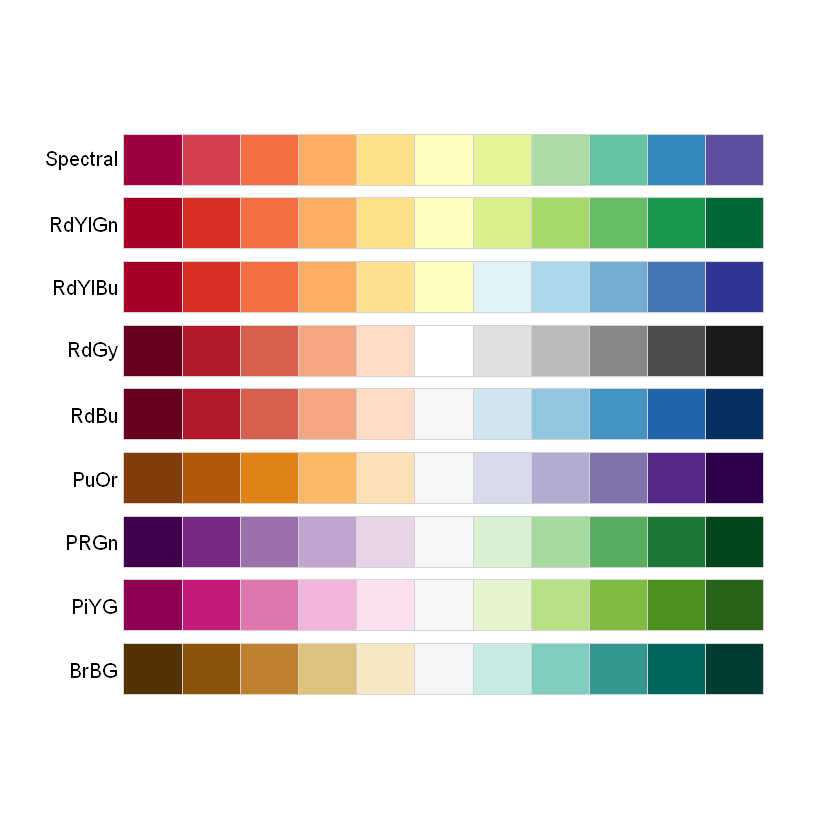

In [29]:
display.brewer.all(type = "div")

## 10.10 Avoid pseudo-three-dimensional plots

The figure below, taken from the scientific literature, shows three variables: dose, drug type and survival. Although your screen/book page is flat and two-dimensional, the plot tries to imitate three dimensions and assigned a dimension to each variable.

![](https://rafalab.github.io/dsbook/dataviz/img/fig8b.png)

Humans are not good at seeing in three dimensions (which explains why it is hard to parallel park) and our limitation is even worse with regard to pseudo-three-dimensions. To see this, try to determine the values of the survival variable in the plot above. Can you tell when the purple ribbon intersects the red one? This is an example in which we can easily use color to represent the categorical variable instead of using a pseudo-3D:

![](https://rafalab.github.io/dsbook/book_files/figure-html/colors-for-different-lines-1.png)

Notice how much easier it is to determine the survival values.

Pseudo-3D is sometimes used completely gratuitously: plots are made to look 3D even when the 3rd dimension does not represent a quantity. This only adds confusion and makes it harder to relay your message. Here are two examples:

![](https://rafalab.github.io/dsbook/dataviz/img/fig2d.png)

## 10.11 Avoid too many significant digits

By default, statistical software like R returns many significant digits. The default behavior in R is to show 7 significant digits. That many digits often adds no information and the added visual clutter can make it hard for the viewer to understand the message. As an example, here are the per 10,000 disease rates, computed from totals and population in R, for California across the five decades:



|state|	year|	Measles|	Pertussis|	Polio|
|-|-|-|-|-|
|California|	1940|	37.8826320|	18.3397861|	0.8266512|
|California|	1950|	13.9124205|	4.7467350|	1.9742639|
|California|	1960|	14.1386471|	NA|	0.2640419|
|California|	1970|	0.9767889|	NA|	NA|
|California|	1980|	0.3743467|	0.0515466|	NA|



We are reporting precision up to 0.00001 cases per 10,000, a very small value in the context of the changes that are occurring across the dates. In this case, two significant figures is more than enough and clearly makes the point that rates are decreasing:



|state|	year|	Measles|	Pertussis|	Polio|
|-|-|--|-|-|
|California|	1940|	37.9|	18.3|	0.8|
|California|	1950|	13.9|	4.7	|2.0|
|California|	1960|	14.1|	NA|	0.3|
|California|	1970|	1.0|	NA|	NA|
|California|	1980|	0.4|	0.1|	NA|

Useful ways to change the number of significant digits or to round numbers are signif and round. You can define the number of significant digits globally by setting options like this: `options(digits = 3)`.

Another principle related to displaying tables is to place values being compared on columns rather than rows. Note that our table above is easier to read than this one:

|state|	disease|	1940|	1950|	1960|	1970|	1980|
|-|-|-|-|-|-|-|
|California|	Measles|	37.9|	13.9|	14.1|	1|	0.4|
|California|	Pertussis|	18.3|	4.7|	NA|	NA|	0.1|
|California|	Polio|	0.8|	2.0|	0.3|	NA|	NA|

<br/><br/>
## 10.12 Know your audience

Graphs can be used for 1) our own exploratory data analysis, 2) to convey a message to experts, or 3) to help tell a story to a general audience. Make sure that the intended audience understands each element of the plot.

As a simple example, consider that for your own exploration it may be more useful to log-transform data and then plot it. However, for a general audience that is unfamiliar with converting logged values back to the original measurements, using a log-scale for the axis instead of log-transformed values will be much easier to digest.

<br/><br/>
## 10.13 Exercises

For these exercises, we will be using the vaccines data in the dslabs package:

In [31]:
library(dslabs)
data(us_contagious_diseases)

1. Pie charts are appropriate:

 a. When we want to display percentages.
 
 b. When __ggplot2__ is not available.
 
 c. When I am in a bakery.
 
 d. Never. Barplots and tables are always better.
 
Answer:d 

2. What is the problem with the plot below:

![](https://rafalab.github.io/dsbook/book_files/figure-html/baplot-not-from-zero-exercises-1.png)

 a. The values are wrong. The final vote was 306 to 232.
 
 b. The axis does not start at 0. Judging by the length, it appears Trump received 3 times as many votes when, in fact, it was about 30% more.

 c. The colors should be the same.

 d. Percentages should be shown as a pie chart.
 
 Answer: b
 
3. Take a look at the following two plots. They show the same information: 1928 rates of measles across the 50 states.

![](https://rafalab.github.io/dsbook/book_files/figure-html/measels-exercise-1.png)

Which plot is easier to read if you are interested in determining which are the best and worst states in terms of rates, and why?

 a. They provide the same information, so they are both equally as good.

 b. The plot on the right is better because it orders the states alphabetically.

 c. The plot on the right is better because alphabetical order has nothing to do with the disease and by ordering according to actual rate, we quickly see the states with most and least rates.

 d. Both plots should be a pie chart.

Answer: c

4. To make the plot on the left, we have to reorder the levels of the states’ variables.

In [36]:
dat <- us_contagious_diseases  %>%
    filter(year == 1967 & disease =="Measles" & !is.na(population)) %>%
    mutate(rate = count/population * 10000 * 52/weeks_reporting)

Note what happens when we make a barplot:

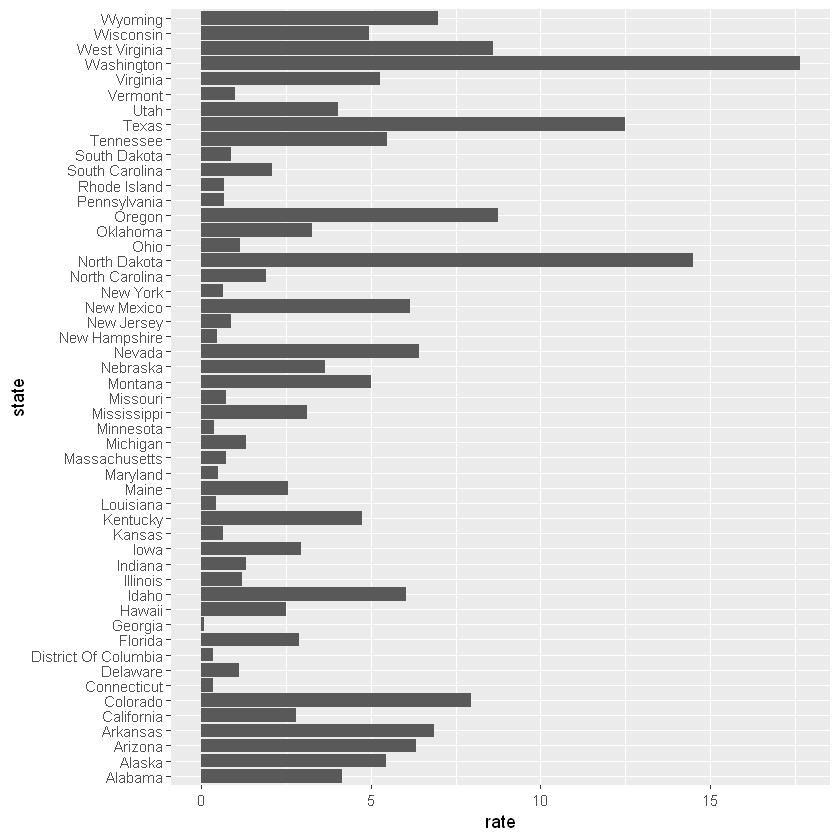

In [37]:
dat %>% ggplot(aes(state, rate)) +
    geom_bar(stat = "identity") +
    coord_flip()

Define these objects:

In [40]:
state <- dat$state
rate <- dat$rate

Redefine the `state` object so that the levels are re-ordered. Print the new object `state` and its levels so you can see that the vector is not re-ordered by the levels.

In [45]:
new_state <- reorder(state, rate)
levels(new_state)
state
help(levels)

[1] "Georgia"              "District Of Columbia" "Connecticut"         
 [4] "Minnesota"            "Louisiana"            "New Hampshire"       
 [7] "Maryland"             "Kansas"               "New York"            
[10] "Pennsylvania"         "Rhode Island"         "Massachusetts"       
[13] "Missouri"             "New Jersey"           "South Dakota"        
[16] "Vermont"              "Delaware"             "Ohio"                
[19] "Illinois"             "Michigan"             "Indiana"             
[22] "North Carolina"       "South Carolina"       "Hawaii"              
[25] "Maine"                "California"           "Florida"             
[28] "Iowa"                 "Mississippi"          "Oklahoma"            
[31] "Nebraska"             "Utah"                 "Alabama"             
[34] "Kentucky"             "Wisconsin"            "Montana"             
[37] "Virginia"             "Alaska"               "Tennessee"           
[40] "Idaho"                "New Mexico"           "Arizona"             
[43] "Nevada"               "Arkansas"             "Wyoming"             
[46] "Colorado"             "West Virginia"        "Oregon"              
[49] "Texas"                "North Dakota"         "Washington"

[1] Alabama              Alaska               Arizona             
 [4] Arkansas             California           Colorado            
 [7] Connecticut          Delaware             District Of Columbia
[10] Florida              Georgia              Hawaii              
[13] Idaho                Illinois             Indiana             
[16] Iowa                 Kansas               Kentucky            
[19] Louisiana            Maine                Maryland            
[22] Massachusetts        Michigan             Minnesota           
[25] Mississippi          Missouri             Montana             
[28] Nebraska             Nevada               New Hampshire       
[31] New Jersey           New Mexico           New York            
[34] North Carolina       North Dakota         Ohio                
[37] Oklahoma             Oregon               Pennsylvania        
[40] Rhode Island         South Carolina       South Dakota        
[43] Tennessee            Texas                Utah                
[46] Vermont              Virginia             Washington          
[49] West Virginia        Wisconsin            Wyoming             
51 Levels: Alabama Alaska Arizona Arkansas California Colorado ... Wyoming

5. Now with one line of code, define the `dat` table as done above, but change the use mutate to create a rate variable and re-order the state variable so that the levels are re-ordered by this variable. Then make a barplot using the code above, but for this new dat.

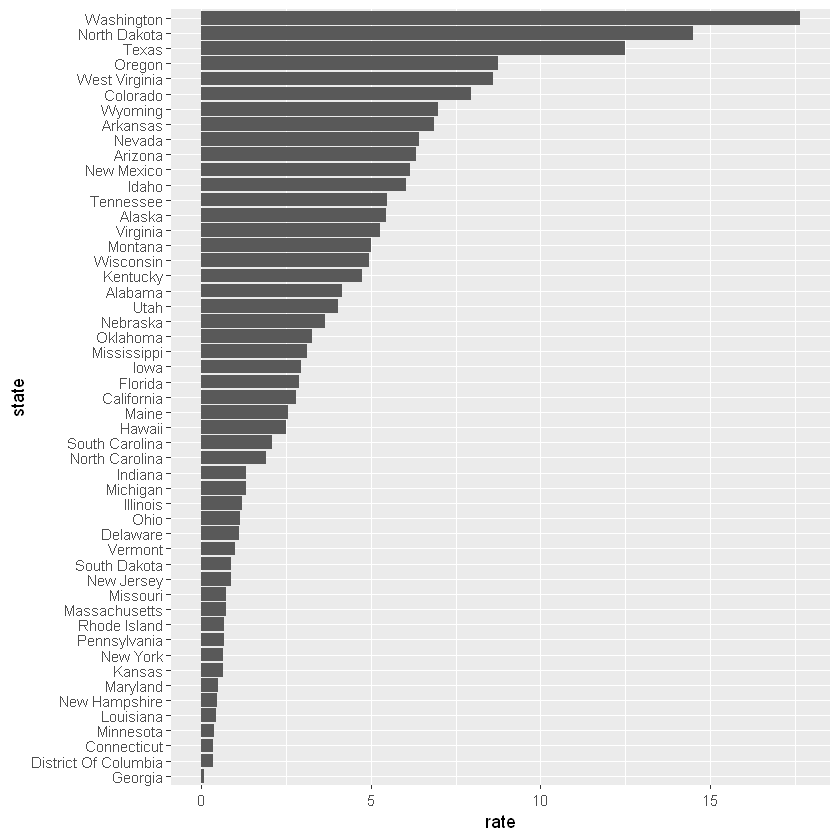

In [55]:
dat <- us_contagious_diseases  %>%
    filter(year == 1967 & disease =="Measles" & !is.na(population)) %>%
    mutate(rate = count/population * 10000 * 52/weeks_reporting) %>%
    mutate(state = reorder(state, rate))
dat %>% ggplot(aes(rate, state)) +
    geom_bar(stat="identity")

6. Say we are interested in comparing gun homicide rates across regions of the US. We see this plot:

`summarise()` ungrouping output (override with `.groups` argument)



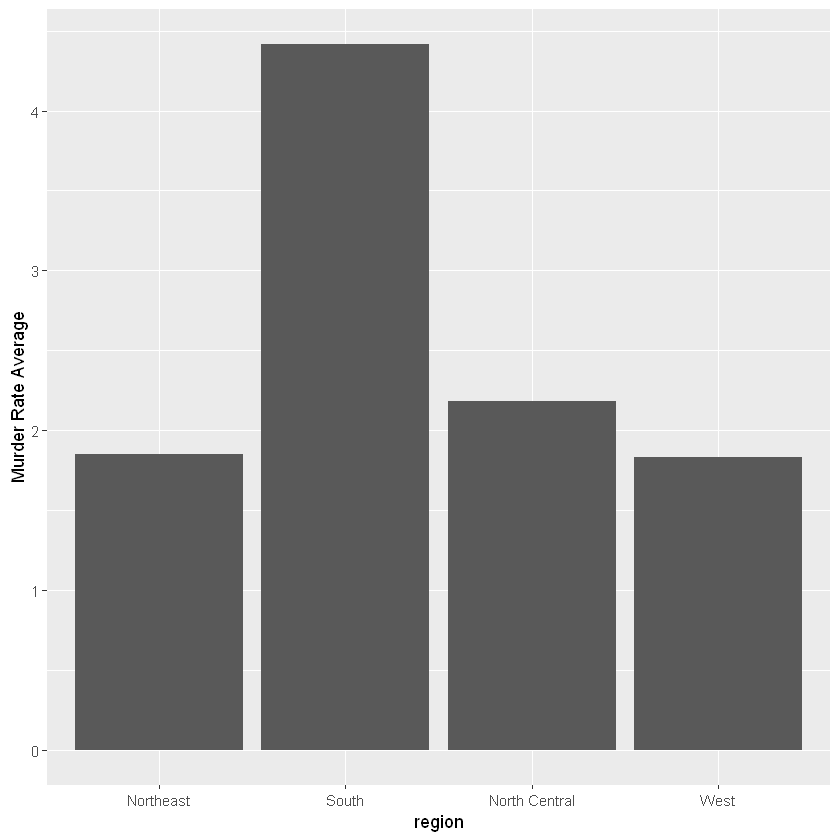

In [56]:
library(dslabs)
data("murders")
murders %>% mutate(rate = total / population * 100000) %>%
group_by(region) %>%
summarize(avg = mean(rate)) %>%
mutate(region = factor(region)) %>%
ggplot(aes(region, avg)) +
geom_bar(stat="identity") +
ylab("Murder Rate Average")


and decide to move to a state in the western region. What is the main problem with this interpretation?

 
 a. The categories are ordered alphabetically.
 
 b. The graph does not show standarad errors.
 
 c. It does not show all the data. We do not see the variability within a region and it’s possible that the safest states are not in the West.
 
 d. The Northeast has the lowest average.
 
Answer: c

7. Make a boxplot of the murder rates defined as

In [59]:
#murders  %>% mutate(rate = total/population*100000)

by region, showing all the points and ordering the regions by their median rate.

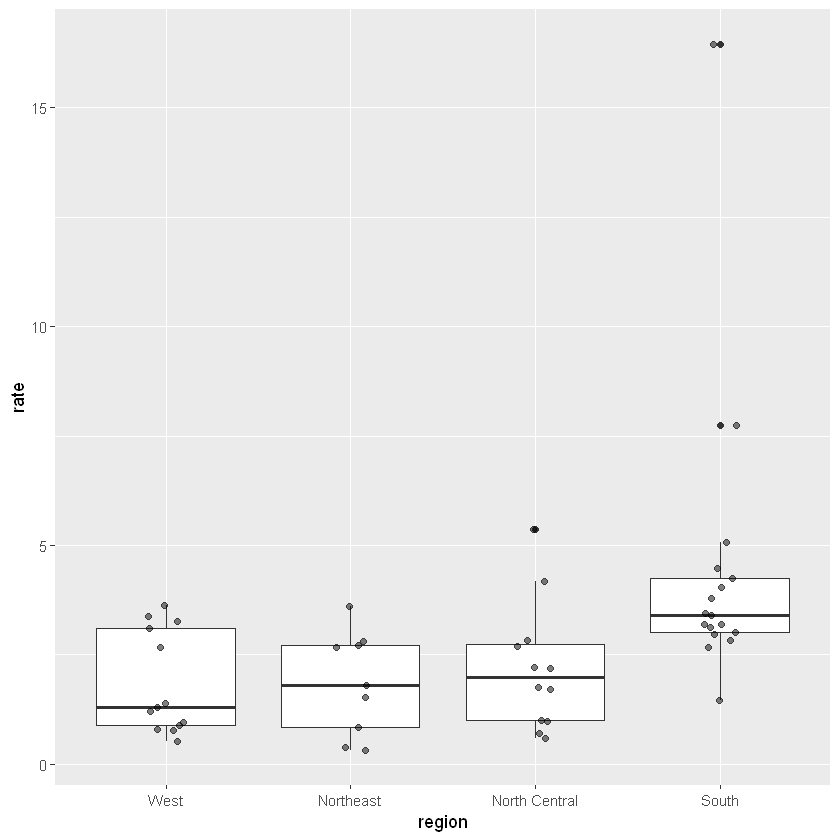

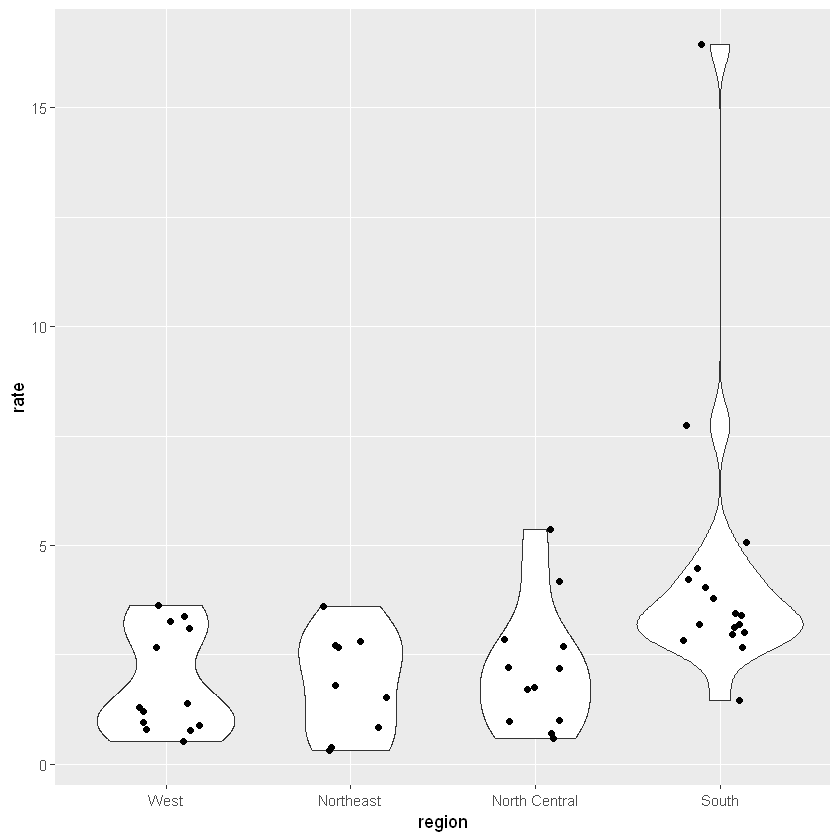

In [74]:
murders %>% mutate(rate = total/population*100000) %>% 
        mutate(region = reorder(region, rate, FUN =  median)) %>%
    ggplot(aes(region, rate)) + 
    geom_boxplot() +
    geom_jitter(width = 0.1, alpha = 0.5)

murders %>% mutate(rate = total/population*100000) %>% 
        mutate(region = reorder(region, rate, FUN =  median)) %>%
    ggplot(aes(region, rate)) +
    geom_violin()+
    geom_jitter(shape=16, position=position_jitter(0.2))
    

8. The plots below show three continuous variables.

![](https://rafalab.github.io/dsbook/book_files/figure-html/pseudo-3d-exercise-1.png)

The line $x=2$ appears to separate the points. But it is actually not the case, which we can see by plotting the data in a couple of two-dimensional points.

![](https://rafalab.github.io/dsbook/book_files/figure-html/pseud-3d-exercise-2-1.png)

Why is this happening?

 a. Humans are not good at reading pseudo-3D plots.

 b. There must be an error in the code.

 c. The colors confuse us.

 d. Scatterplots should not be used to compare two variables when we have access to 3.

Answer:a

9. Reproduce the image plot we previously made but for smallpox. For this plot, do not include years in which cases were not reported in 10 or more weeks.

,disease,state,year,weeks_reporting,count,population,rate
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Smallpox,Alabama,1928,51,341,2589923,1.3424580
2,Smallpox,Alabama,1929,52,378,2619131,1.4432268
3,Smallpox,Alabama,1930,52,192,2646248,0.7255556
4,Smallpox,Alabama,1931,52,295,2670818,1.1045305
5,Smallpox,Alabama,1932,52,467,2693027,1.7341081
6,Smallpox,Alabama,1933,52,82,2713243,0.3022214


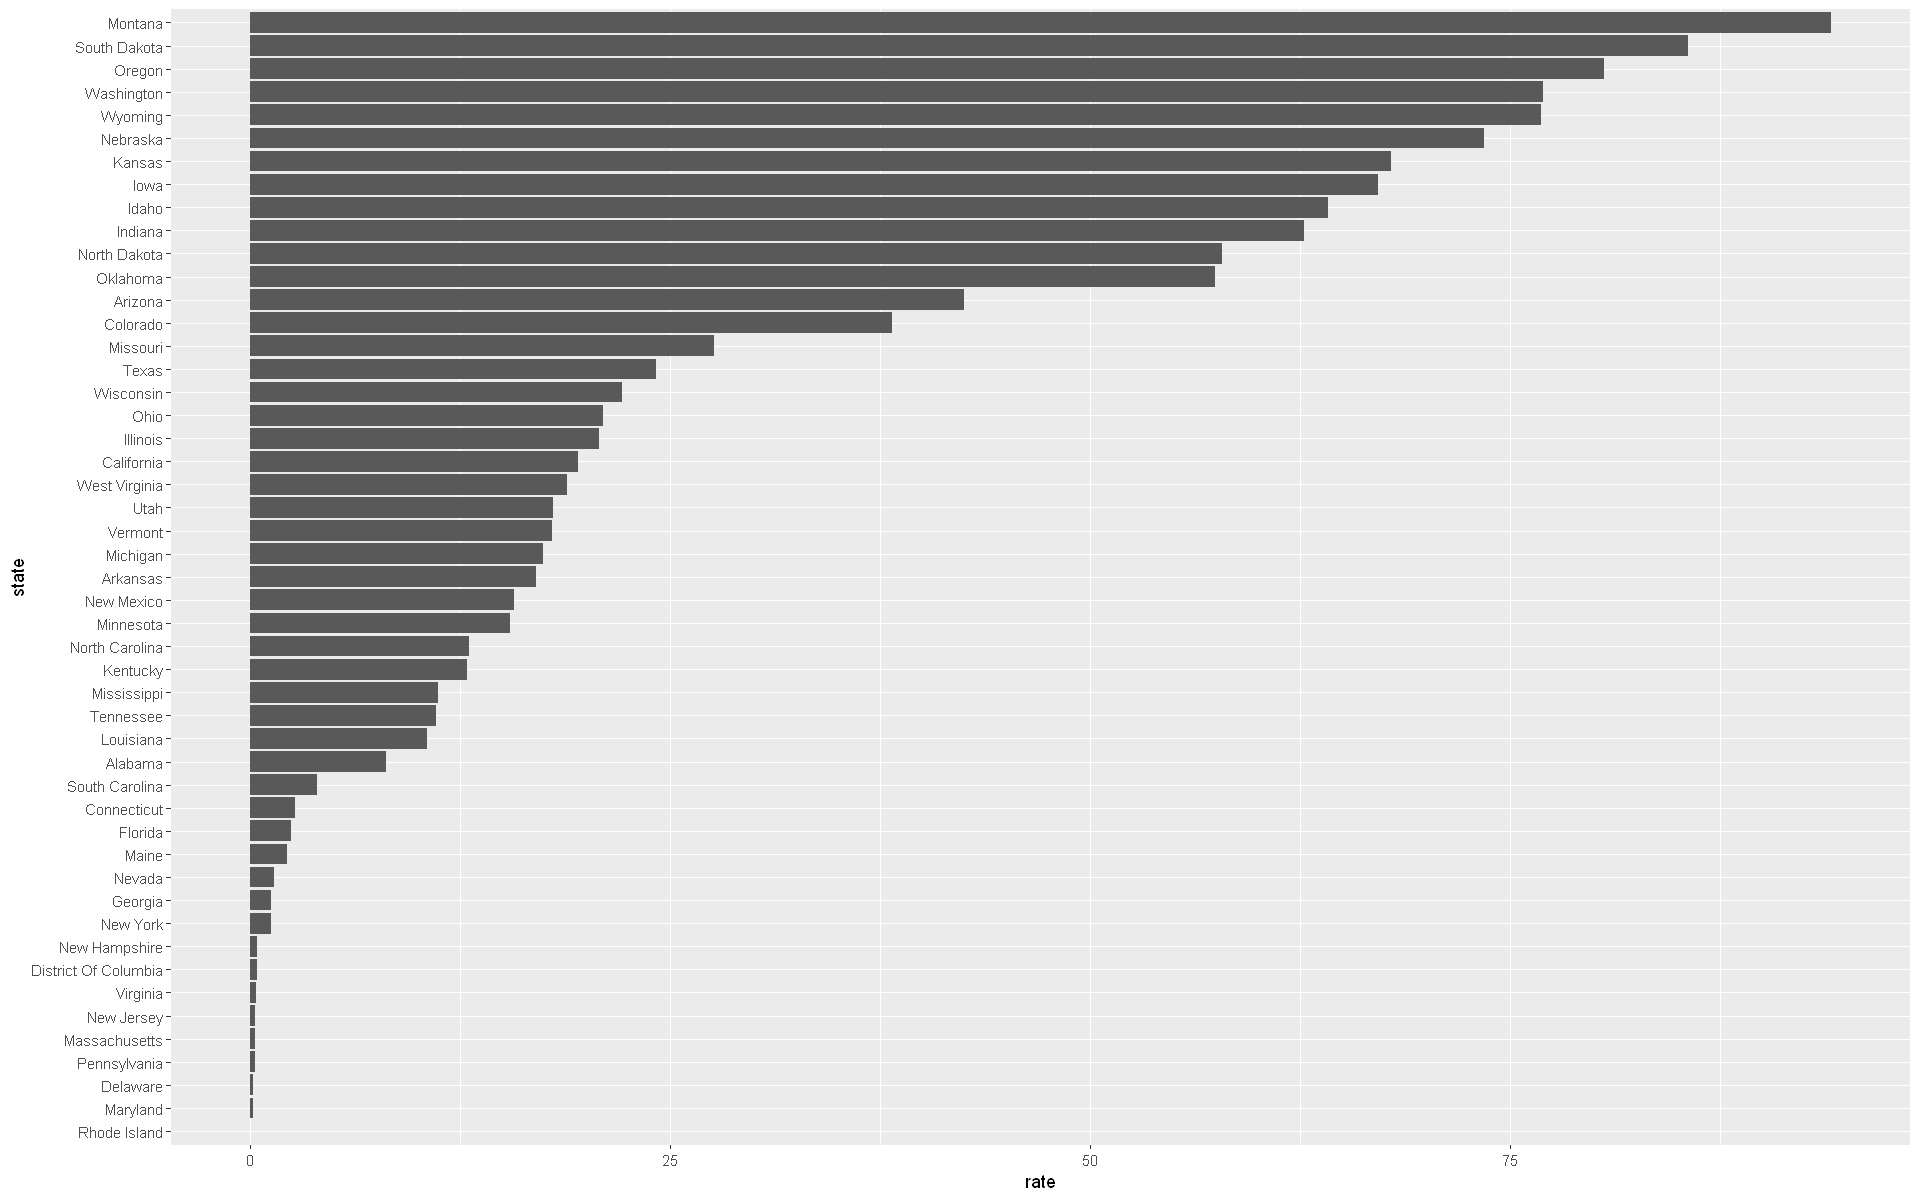

In [171]:
dat <- us_contagious_diseases %>% 
    filter(disease == "Smallpox"& weeks_reporting > 10 & !is.na(population)) %>%
    mutate(rate = count/population*10000*52/weeks_reporting) %>%
    mutate(state = reorder(state, rate, FUN = sum))

head(dat)

dat %>% ggplot(aes(state, rate)) +
    geom_bar(stat="identity")+
    coord_flip()

10. Now reproduce the time series plot we previously made, but this time following the instructions of the previous question.

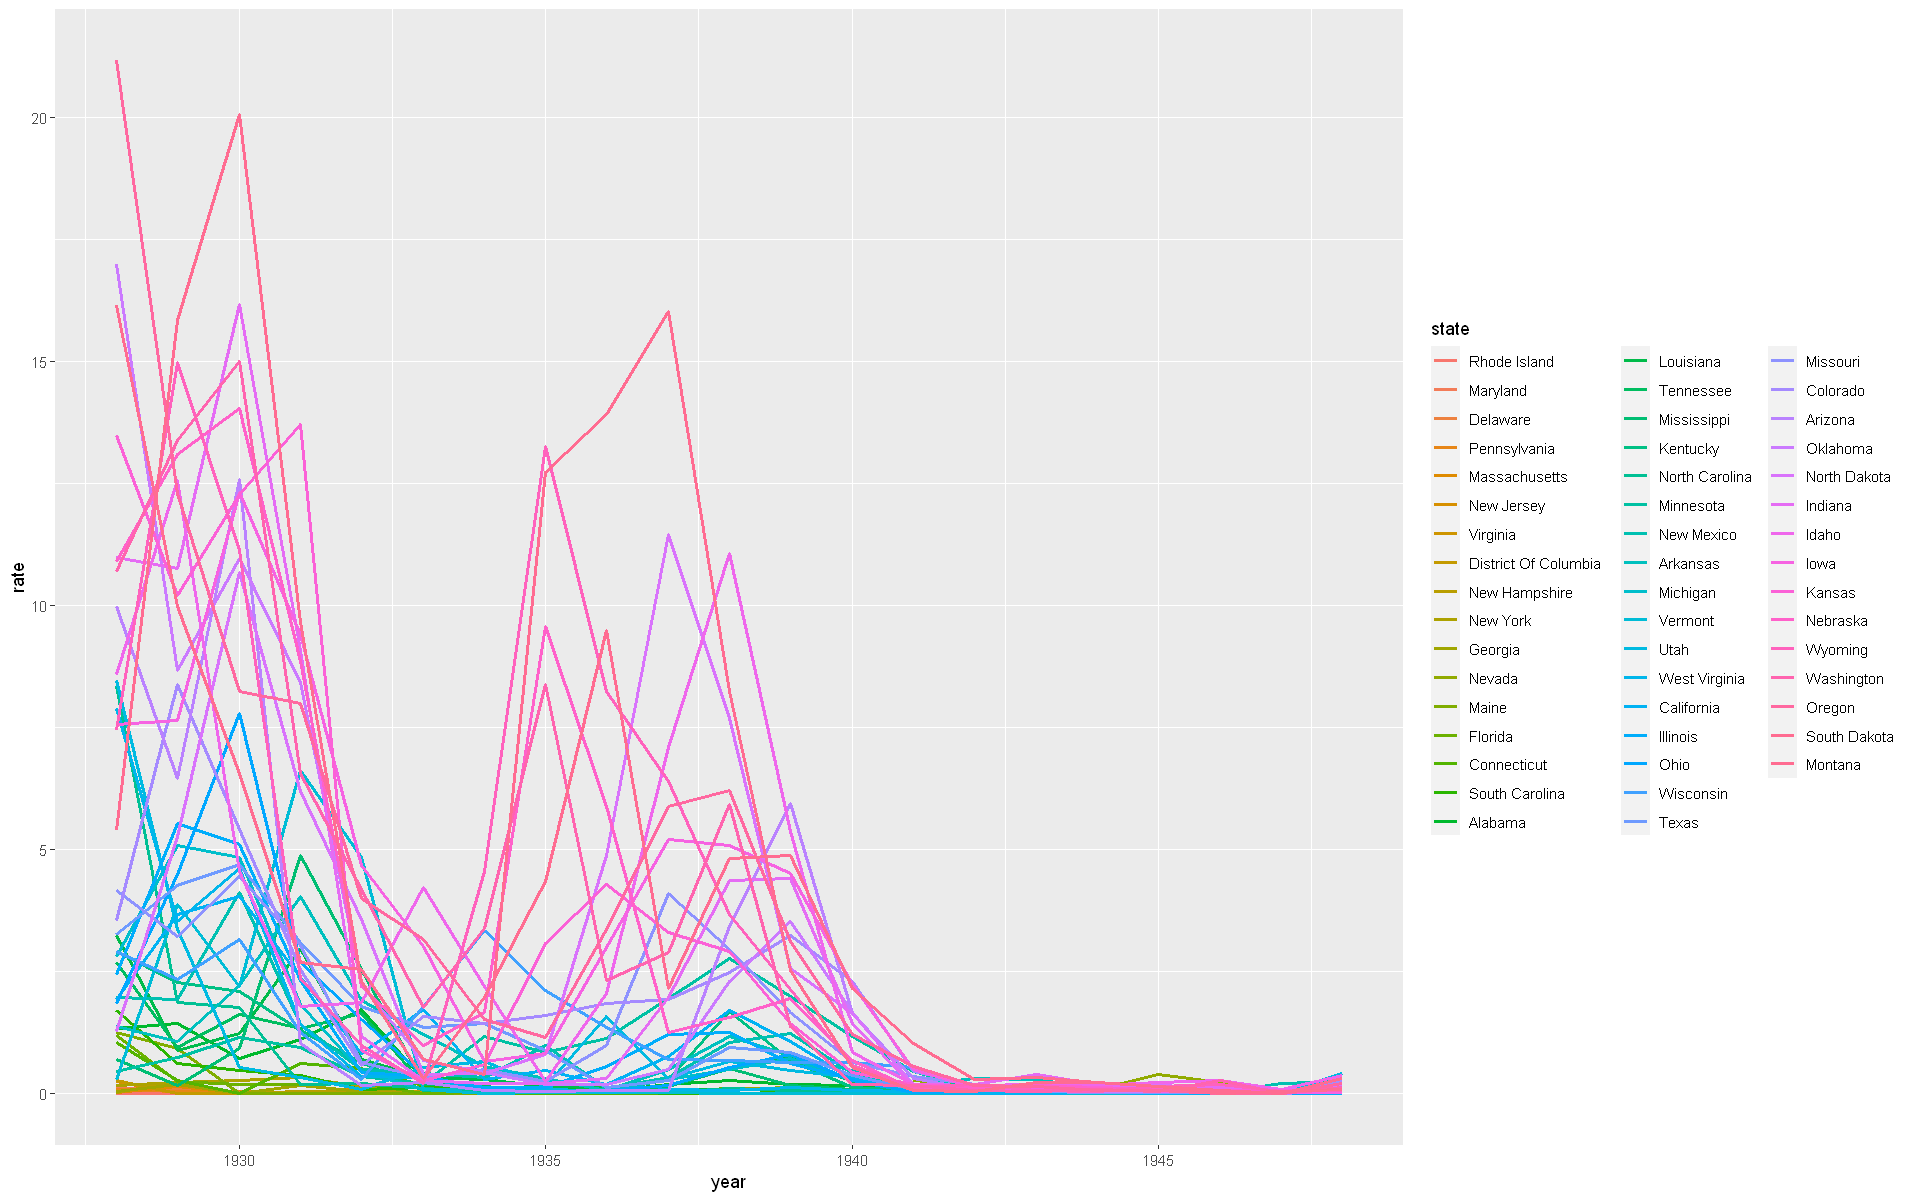

In [137]:
library(repr)
options(repr.plot.width = 16, repr.plot.height = 10)
dat %>% ggplot(aes(year, rate, color = state)) +
    geom_line(lwd = 1) 


11. For the state of California, make time series plots showing rates for all diseases. Include only years with 10 or more weeks reporting. Use a different color for each disease.

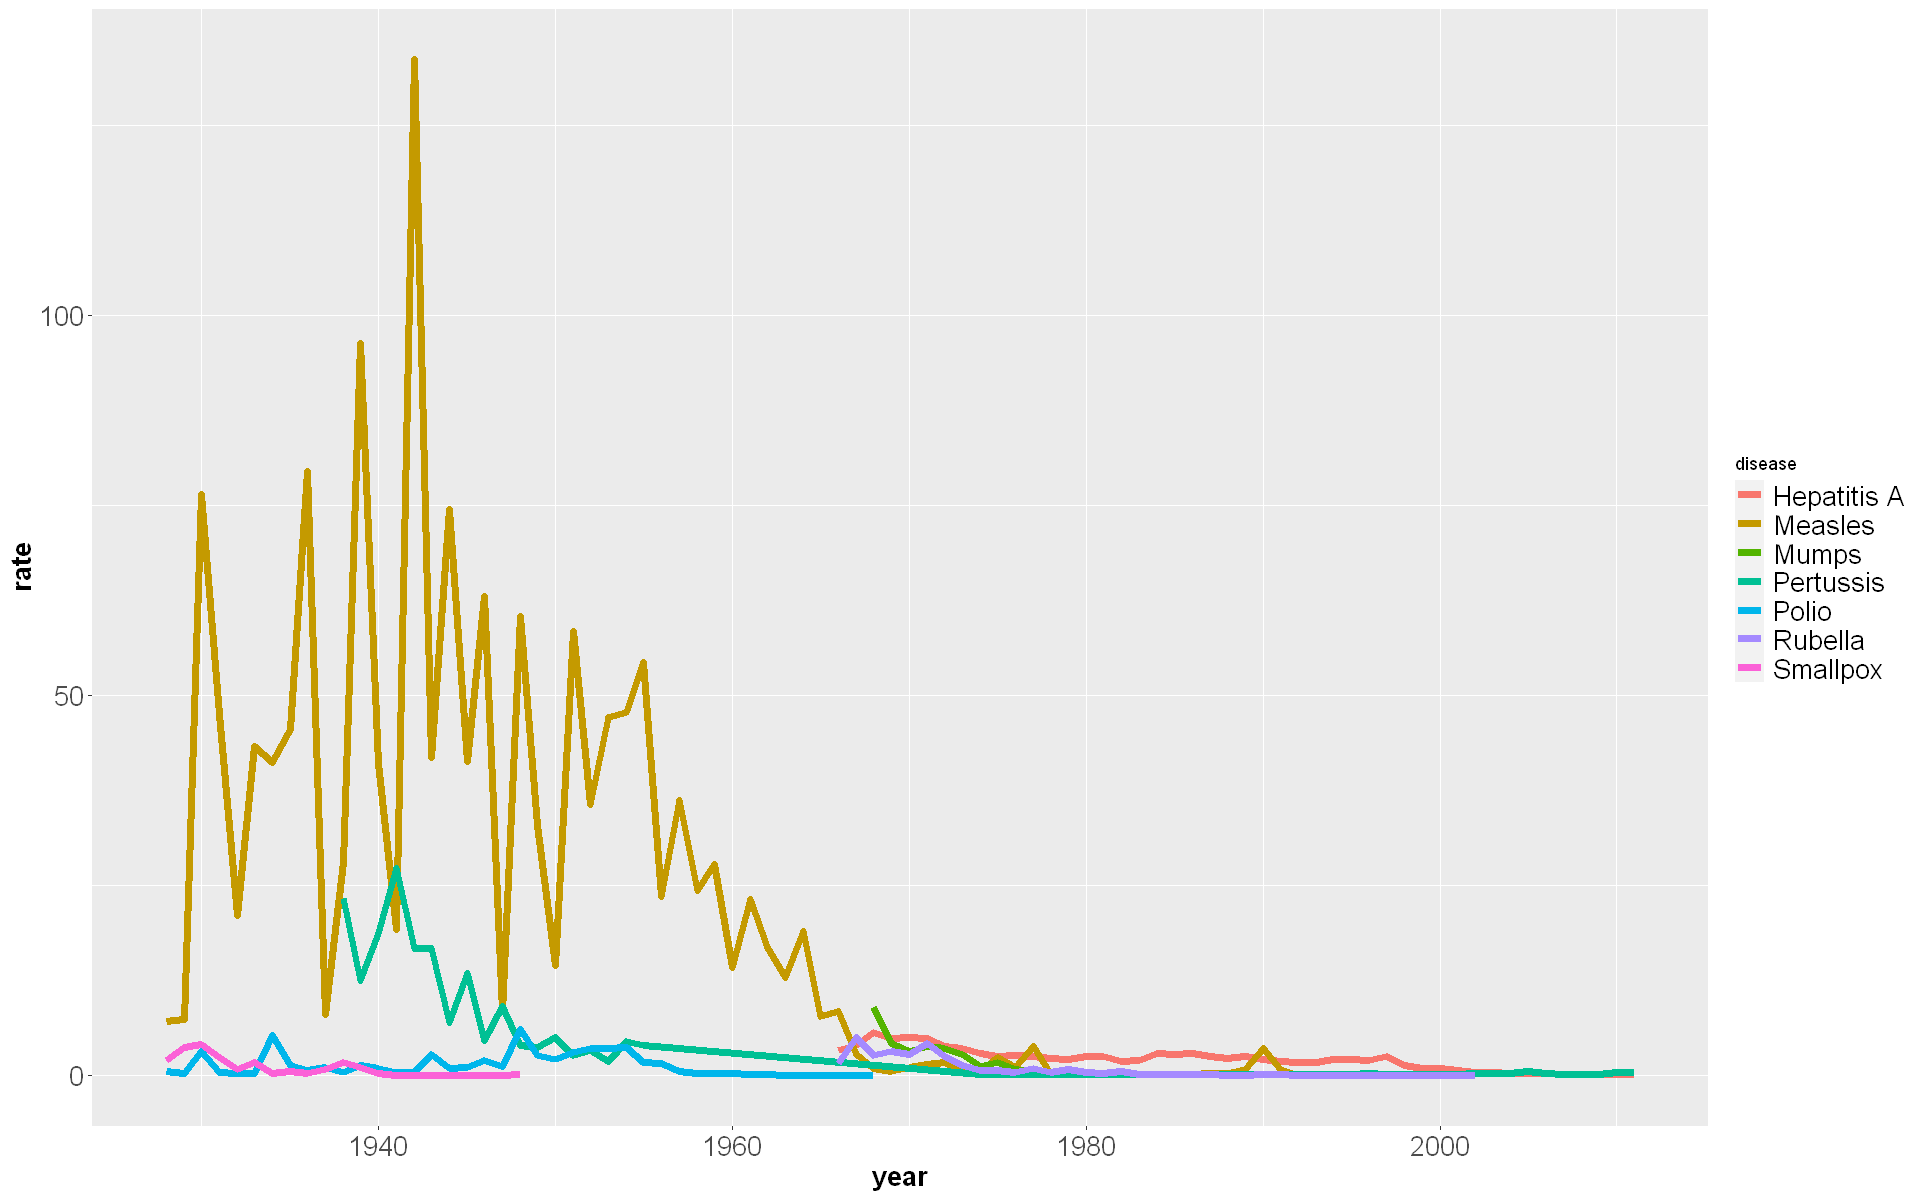

In [135]:
dat2 <- us_contagious_diseases %>%
    filter(state == "California" & weeks_reporting >= 10 & !is.na(population)) %>%
    mutate(rate = count / population * 52 * 10000 / weeks_reporting)

dat2 %>% ggplot(aes(year, rate, color = disease)) +
    geom_line(lwd = 2) +
    theme(axis.text=element_text(size=16),
          axis.title=element_text(size=16,face="bold"),
          legend.text=element_text(size=16))

12. Now do the same for the rates for the US. Hint: compute the US rate by using summarize, the total divided by total population.

`summarise()` regrouping output by 'year' (override with `.groups` argument)



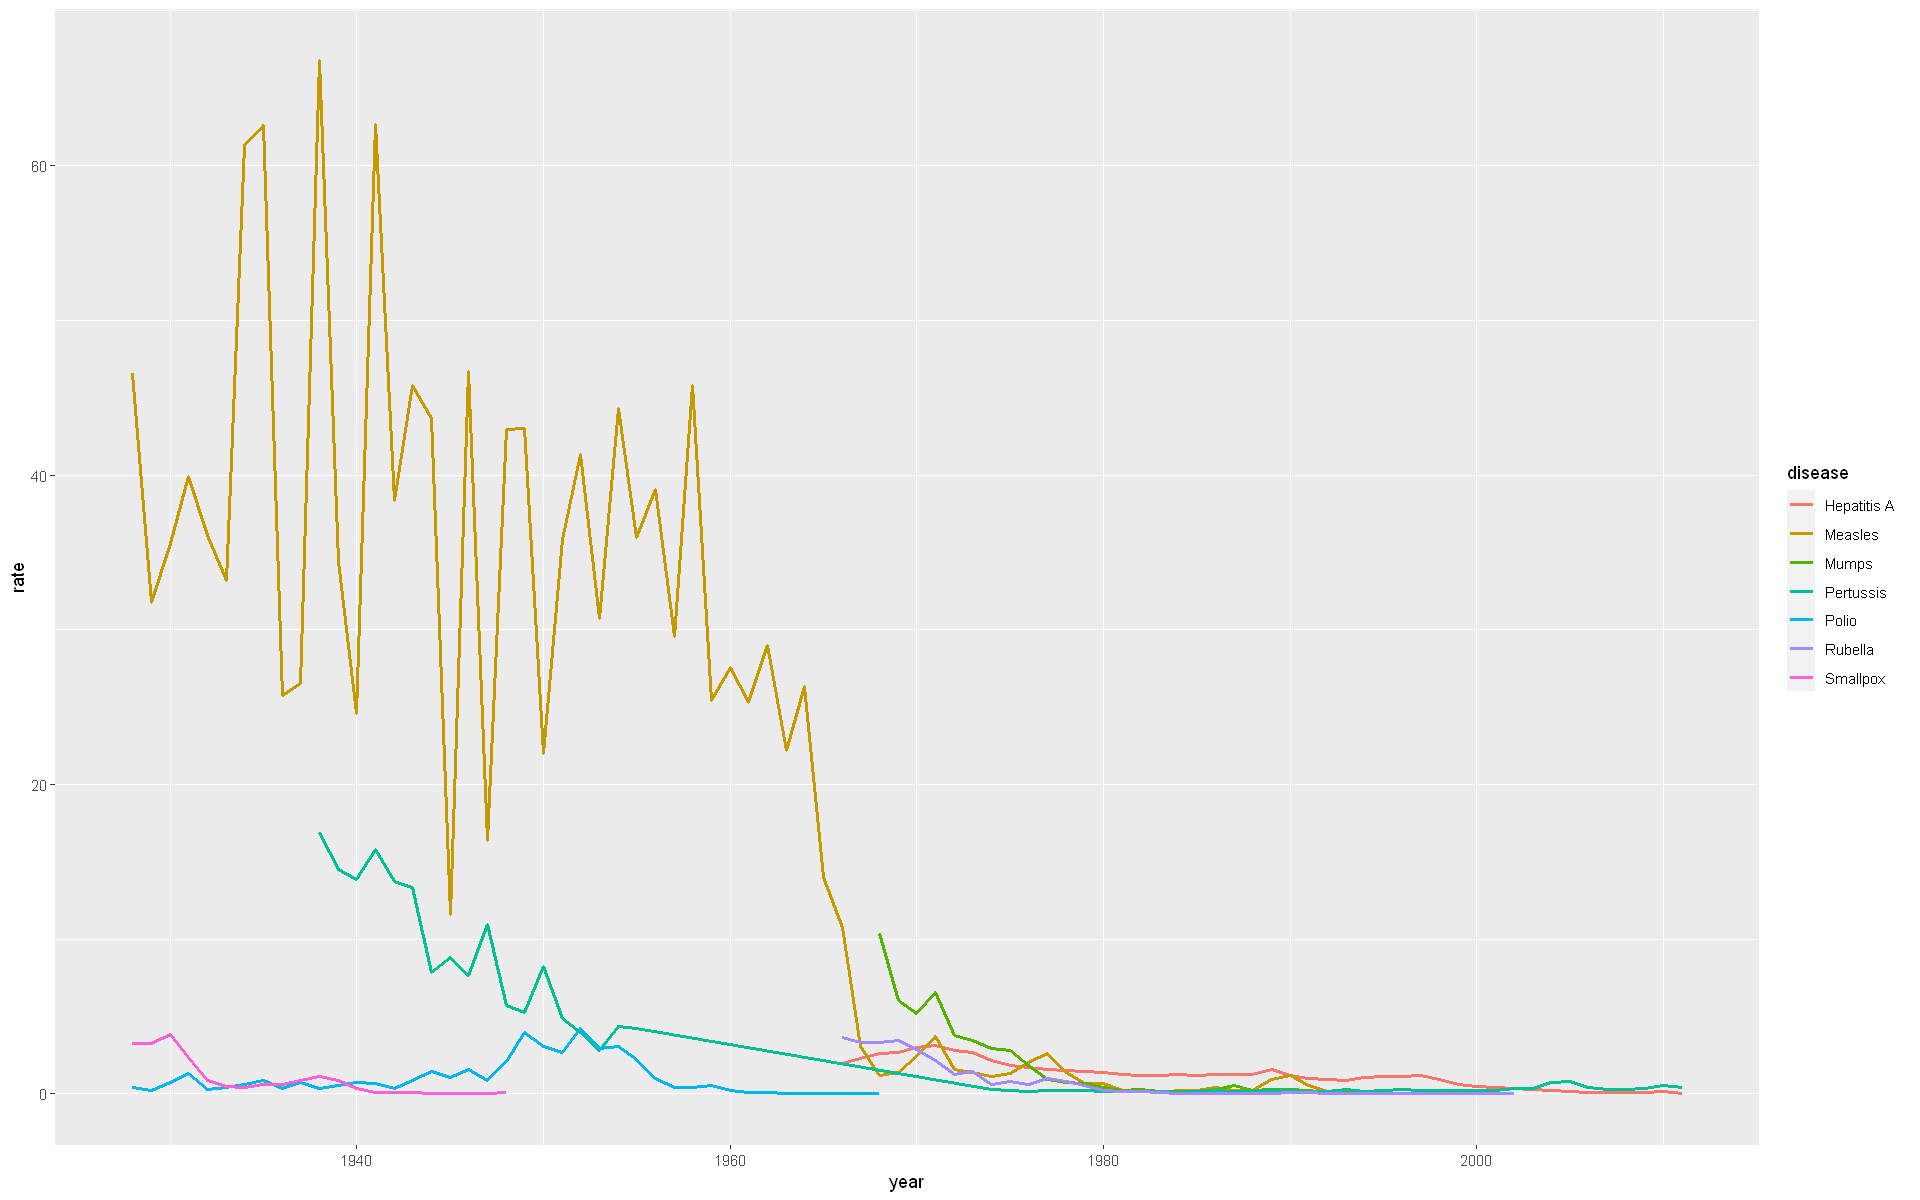

In [148]:
dat3 <- us_contagious_diseases %>%
    filter(weeks_reporting >= 10 & !is.na(population)) %>%
    group_by(year,disease) %>%
    summarize(count = sum(count), population = sum(population), 
              weeks_reporting_mean = mean(weeks_reporting)) %>%
    mutate(rate = count / population *52 * 10000 / weeks_reporting_mean)
 
dat3 %>% ggplot(aes(year, rate, color = disease)) +
    geom_line(lwd = 1)

## 10.14 Case study: vaccines and infectious diseases

Vaccines have helped save millions of lives. In the 19th century, before herd immunization was achieved through vaccination programs, deaths from infectious diseases, such as smallpox and polio, were common. However, today vaccination programs have become somewhat controversial despite all the scientific evidence for their importance.

The controversy started with a paper published in 1988 and led by Andrew Wakefield claiming there was a link between the administration of the measles, mumps, and rubella (MMR) vaccine and the appearance of autism and bowel disease. Despite much scientific evidence contradicting this finding, sensationalist media reports and fear-mongering from conspiracy theorists led parts of the public into believing that vaccines were harmful. As a result, many parents ceased to vaccinate their children. This dangerous practice can be potentially disastrous given that the Centers for Disease Control (CDC) estimates that vaccinations will prevent more than 21 million hospitalizations and 732,000 deaths among children born in the last 20 years (see Benefits from Immunization during the Vaccines for Children Program Era — United States, 1994-2013, MMWR). The 1988 paper has since been retracted and Andrew Wakefield was eventually “struck off the UK medical register, with a statement identifying deliberate falsification in the research published in The Lancet, and was thereby barred from practicing medicine in the UK.” (source: Wikipedia). Yet misconceptions persist, in part due to self-proclaimed activists who continue to disseminate misinformation about vaccines.

Effective communication of data is a strong antidote to misinformation and fear-mongering. Earlier we used an example provided by a Wall Street Journal article showing data related to the impact of vaccines on battling infectious diseases. Here we reconstruct that example.

The data used for these plots were collected, organized, and distributed by the Tycho Project. They include weekly reported counts for seven diseases from 1928 to 2011, from all fifty states. We include the yearly totals in the __dslabs__ package:

In [149]:
library(tidyverse)
library(RColorBrewer)
library(dslabs)
data(us_contagious_diseases)
names(us_contagious_diseases)

[1] "disease"         "state"           "year"            "weeks_reporting"
[5] "count"           "population"

We create a temporary object `dat` that stores only the measles data, includes a per 100,000 rate, orders states by average value of disease and removes Alaska and Hawaii since they only became states in the late 1950s. Note that there is a `weeks_reporting` column that tells us for how many weeks of the year data was reported. We have to adjust for that value when computing the rate.

In [150]:
the_disease <- "Measles"
dat <- us_contagious_diseases %>%
    filter(!state %in% c("Hawaii", "Alaska") & disease == the_disease) %>%
    mutate(rate = count/ population * 10000 *52 /weeks_reporting)  %>% 
    mutate(state = reorder(state,rate))

We can now easily plot disease rates per year. Here are the measles data from California:

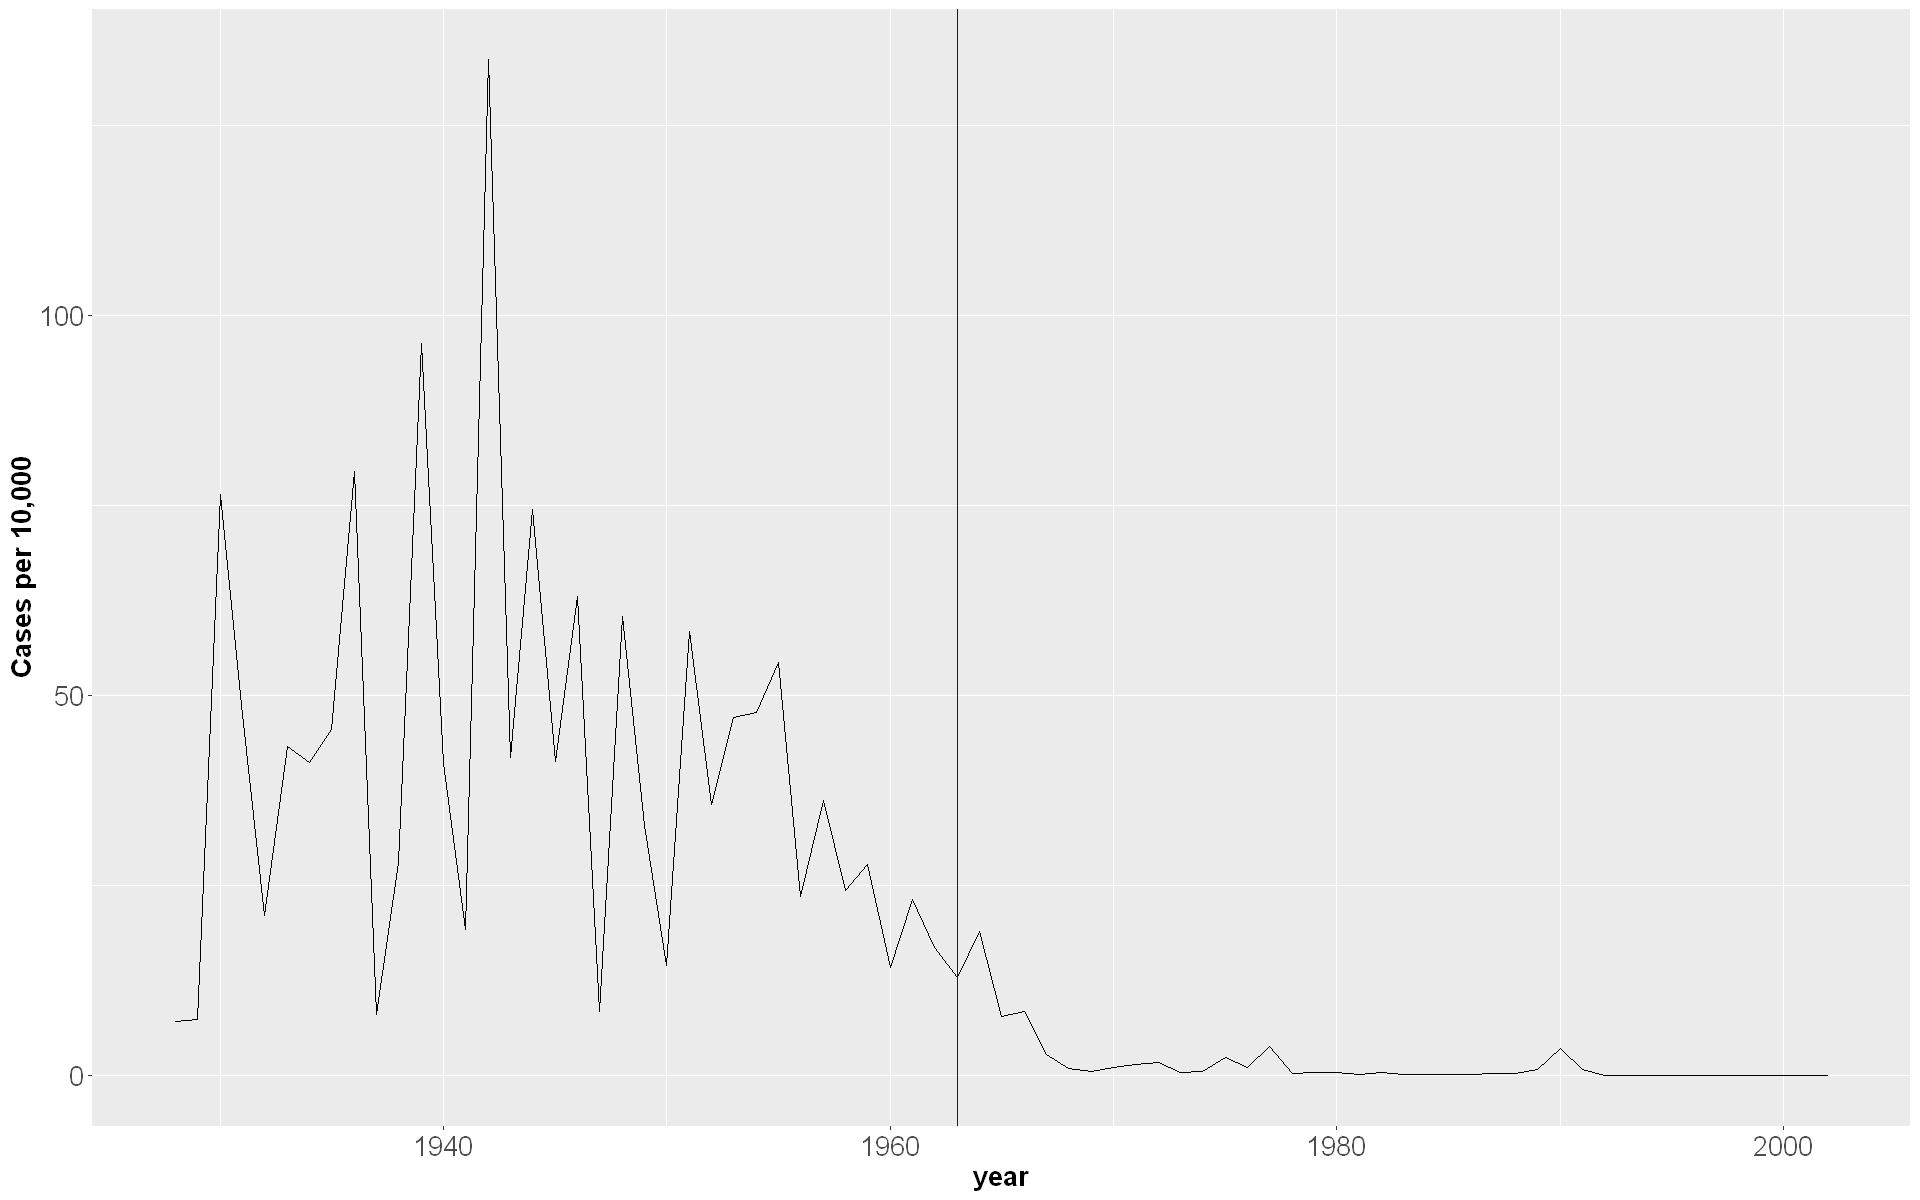

In [152]:
dat %>% filter(state == "California" & !is.na(rate)) %>%
    ggplot(aes(year, rate)) +
    geom_line() +
    ylab("Cases per 10,000") +
    geom_vline(xintercept = 1963, col = "blue") +
    theme(axis.text=element_text(size=16),
          axis.title=element_text(size=16,face="bold"))

We add a vertical line at 1963 since this is when the vaccine was introduced [Control, Centers for Disease; Prevention (2014). CDC health information for international travel 2014 (the yellow book). p. 250. ISBN 9780199948505].

Now can we show data for all states in one plot? We have three variables to show: year, state, and rate. In the WSJ figure, they use the x-axis for year, the y-axis for state, and color hue to represent rates. However, the color scale they use, which goes from yellow to blue to green to orange to red, can be improved.

In our example, we want to use a sequential palette since there is no meaningful center, just low and high rates.

We use the geometry `geom_tile` to tile the region with colors representing disease rates. We use a square root transformation to avoid having the really high counts dominate the plot. Notice that missing values are shown in grey. Note that once a disease was pretty much eradicated, some states stopped reporting cases all together. This is why we see so much grey after 1980.

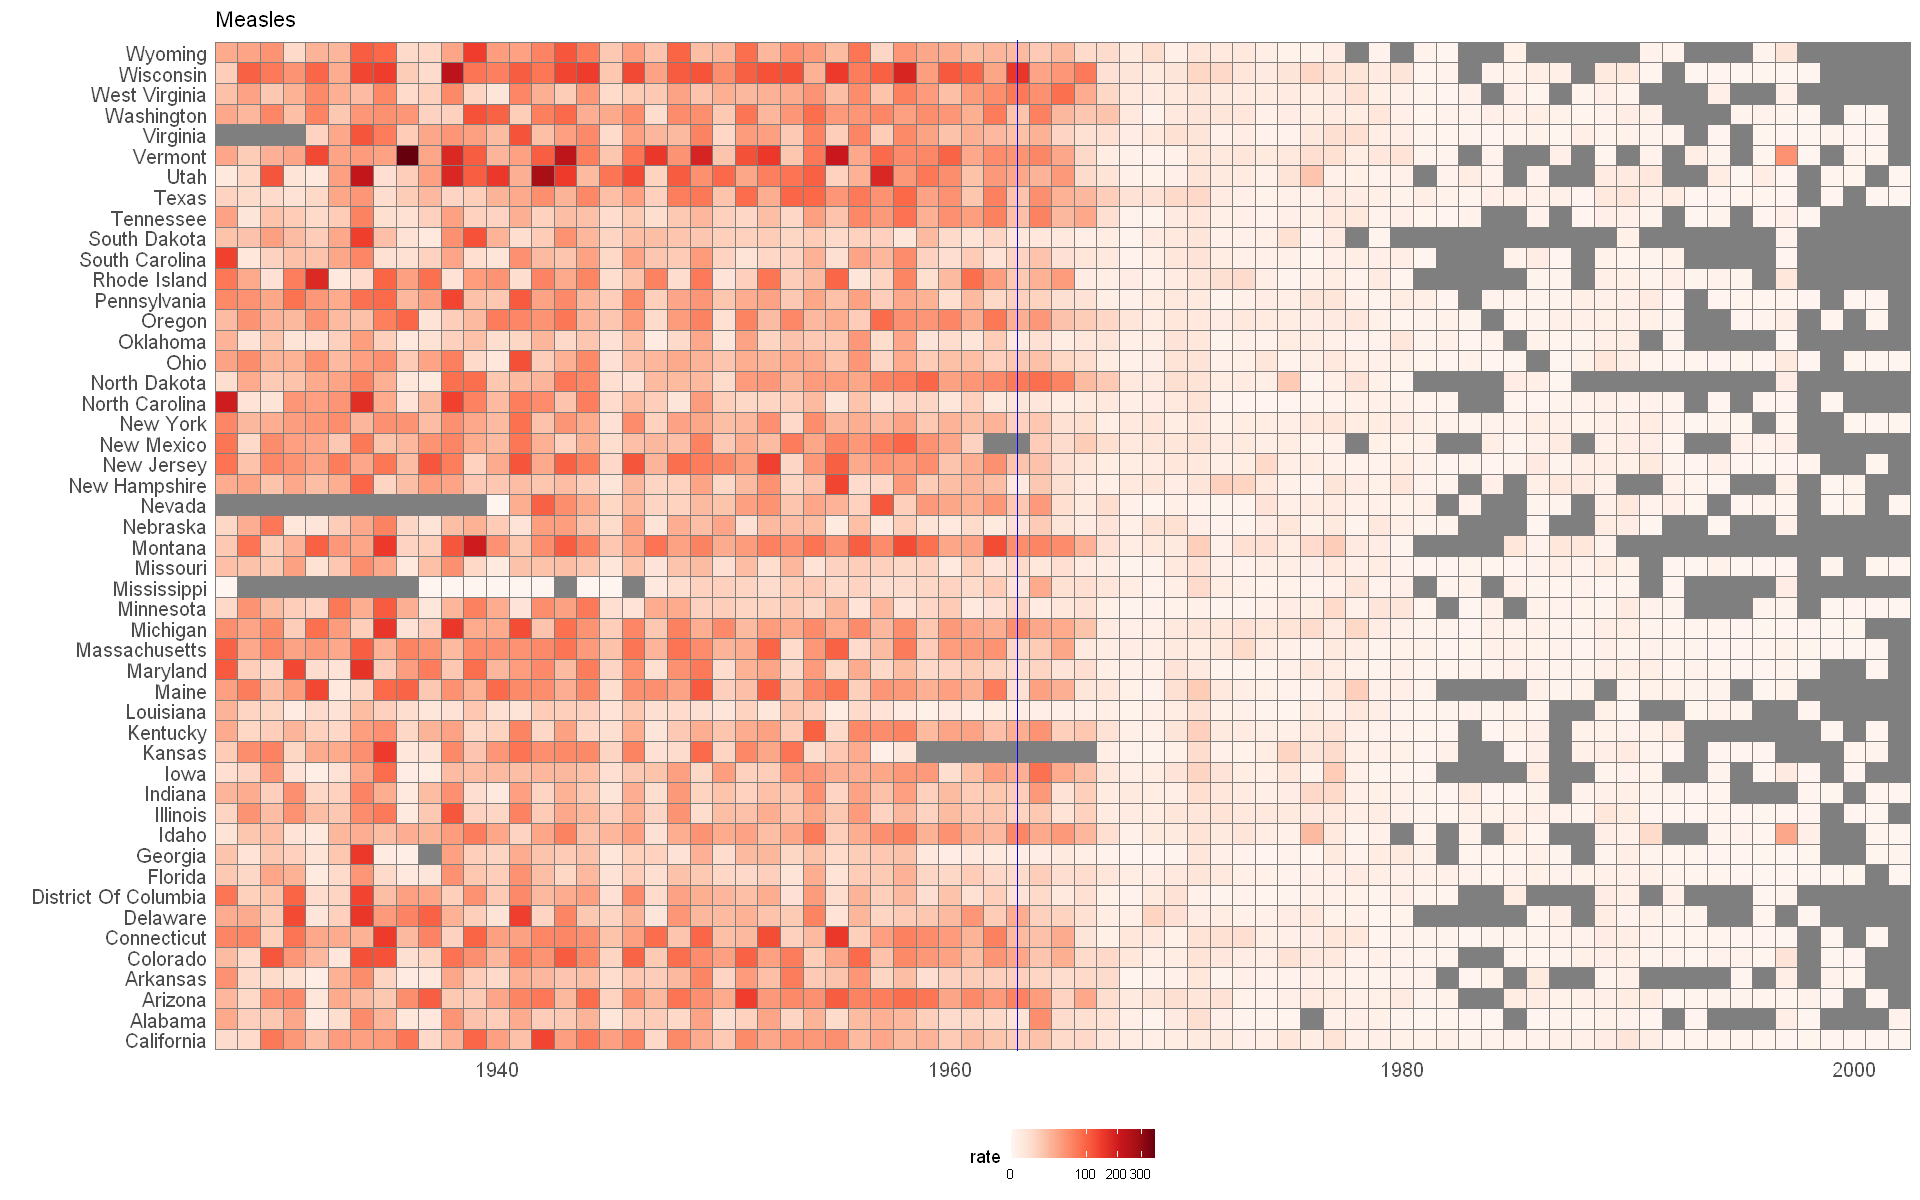

In [163]:
dat %>% ggplot(aes(year, state, fill = rate)) +
    geom_tile(color = "grey50") +
    scale_x_continuous(expand = c(0,0)) +
    scale_fill_gradientn(colors = brewer.pal(9, "Reds"), trans = "sqrt") +
    geom_vline(xintercept=1963, col = "blue") +
    theme_minimal() +
    theme(panel.grid = element_blank(),
          legend.position = "bottom",
          axis.text = element_text(size = 12),
          legend.text = element_text(size = 8)) +
    ggtitle(the_disease) +
    ylab("") +xlab("")

This plot makes a very striking argument for the contribution of vaccines. However, one limitation of this plot is that it uses color to represent quantity, which we earlier explained makes it harder to know exactly how high values are going. Position and lengths are better cues. If we are willing to lose state information, we can make a version of the plot that shows the values with position. We can also show the average for the US, which we compute like this:

In [165]:
avg <- us_contagious_diseases %>%
    filter(disease == the_disease) %>% group_by(year) %>%
    summarize(us_rate = sum(count, na.rm = TRUE)/sum(population, na.rm = TRUE) * 10000)

`summarise()` ungrouping output (override with `.groups` argument)



Now to make the plot we simply use the `geom_line` geometry:


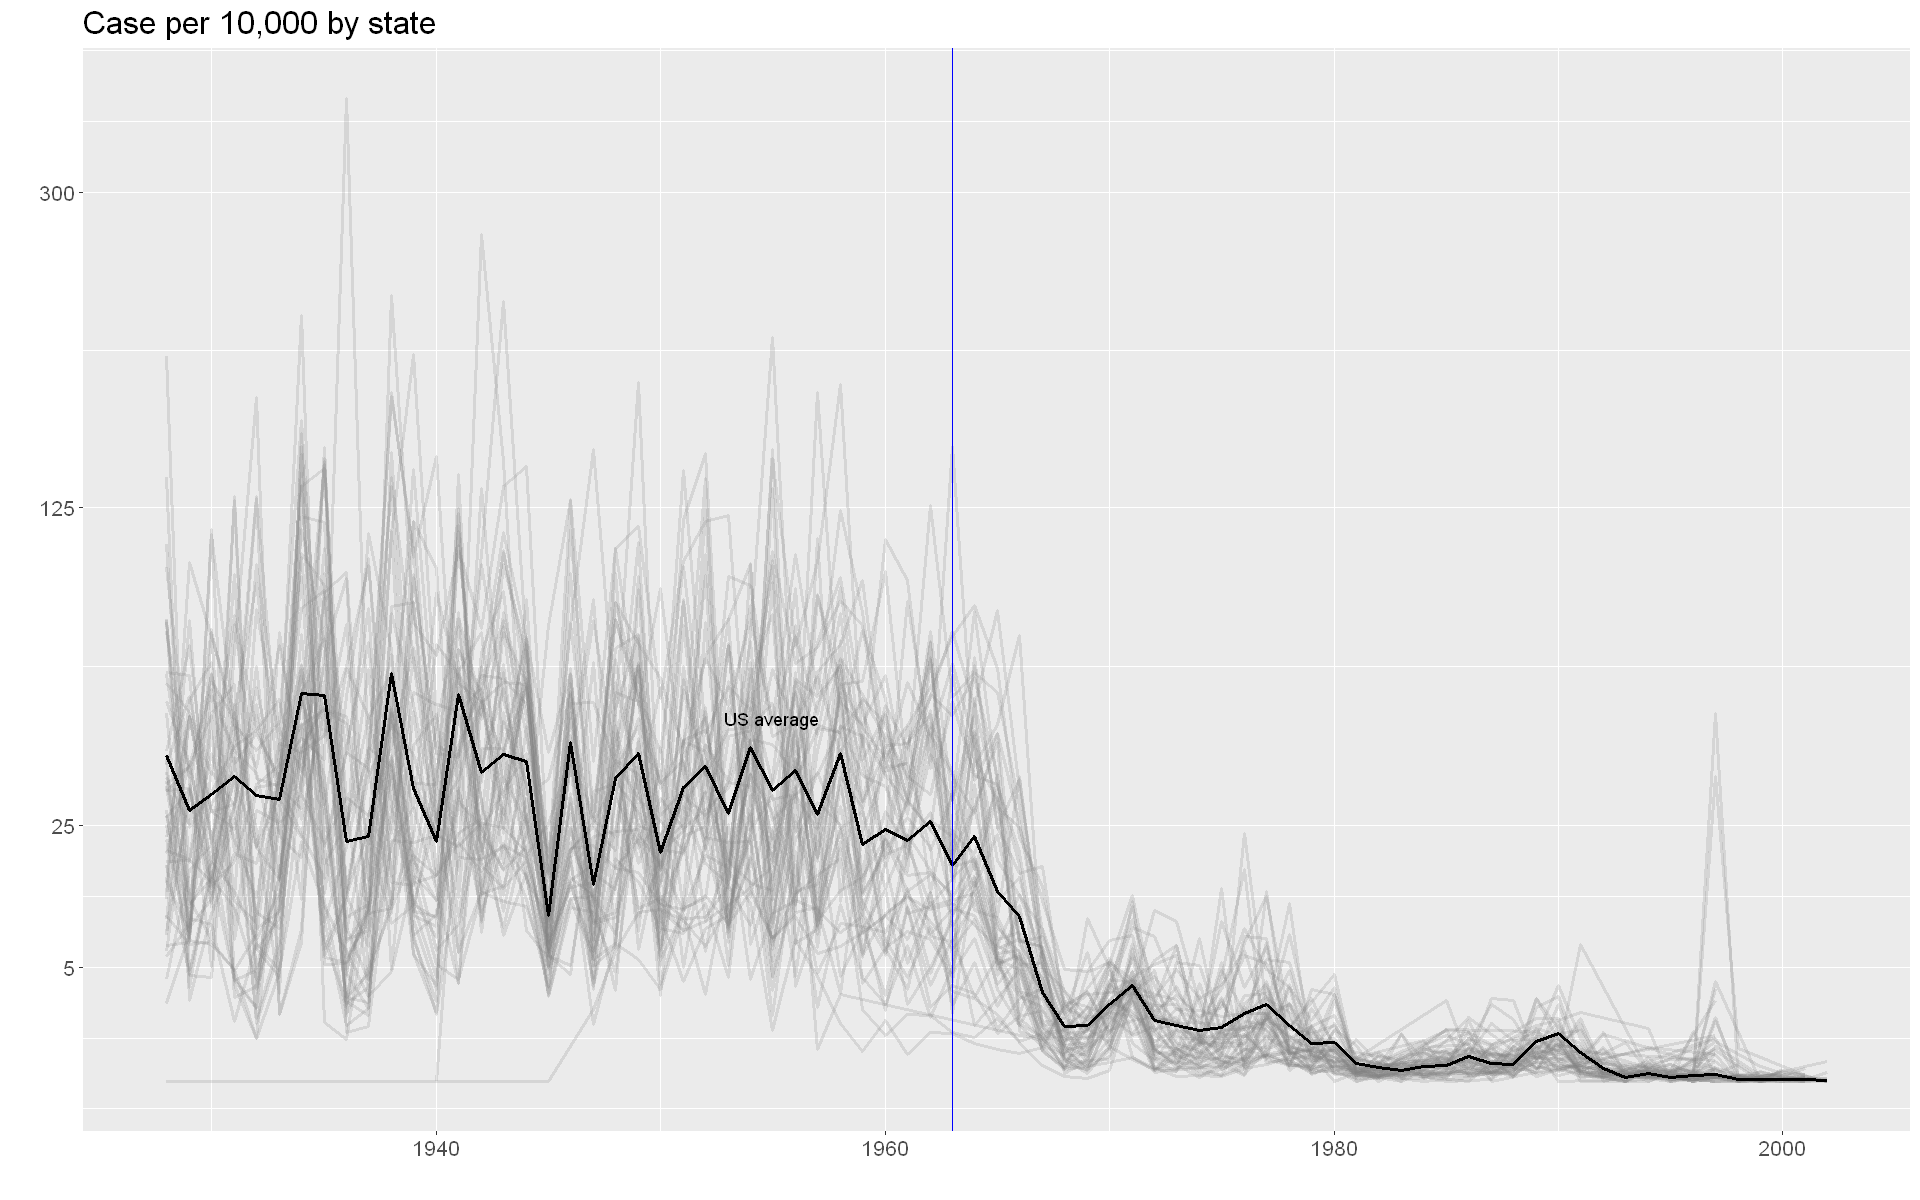

In [168]:
dat %>%
    filter(!is.na(rate)) %>%
        ggplot() +
    geom_line(aes(year, rate, group = state), color = "grey50",
              show.legend = FALSE, alpha = 0.2, size = 1) +
    geom_line(mapping = aes(year, us_rate), data = avg, size = 1) +
    scale_y_continuous(trans = "sqrt", breaks = c(5, 25, 125, 300)) +
    ggtitle("Case per 10,000 by state") +
    xlab("") + ylab("") +
    geom_text(data = data.frame(x = 1955, y = 50),
              mapping = aes(x, y, label = "US average"), 
              color = "black") +
    geom_vline(xintercept = 1963, col = "blue") +
    theme(text = element_text(size = 16))

In theory, we could use color to represent the categorical value state, but it is hard to pick 50 distinct colors.

<br/><br/>
## 10.15 Exercises

1. Reproduce the image plot we previously made but for smallpox. For this plot, do not include years in which cases were not reported in 10 or more weeks.

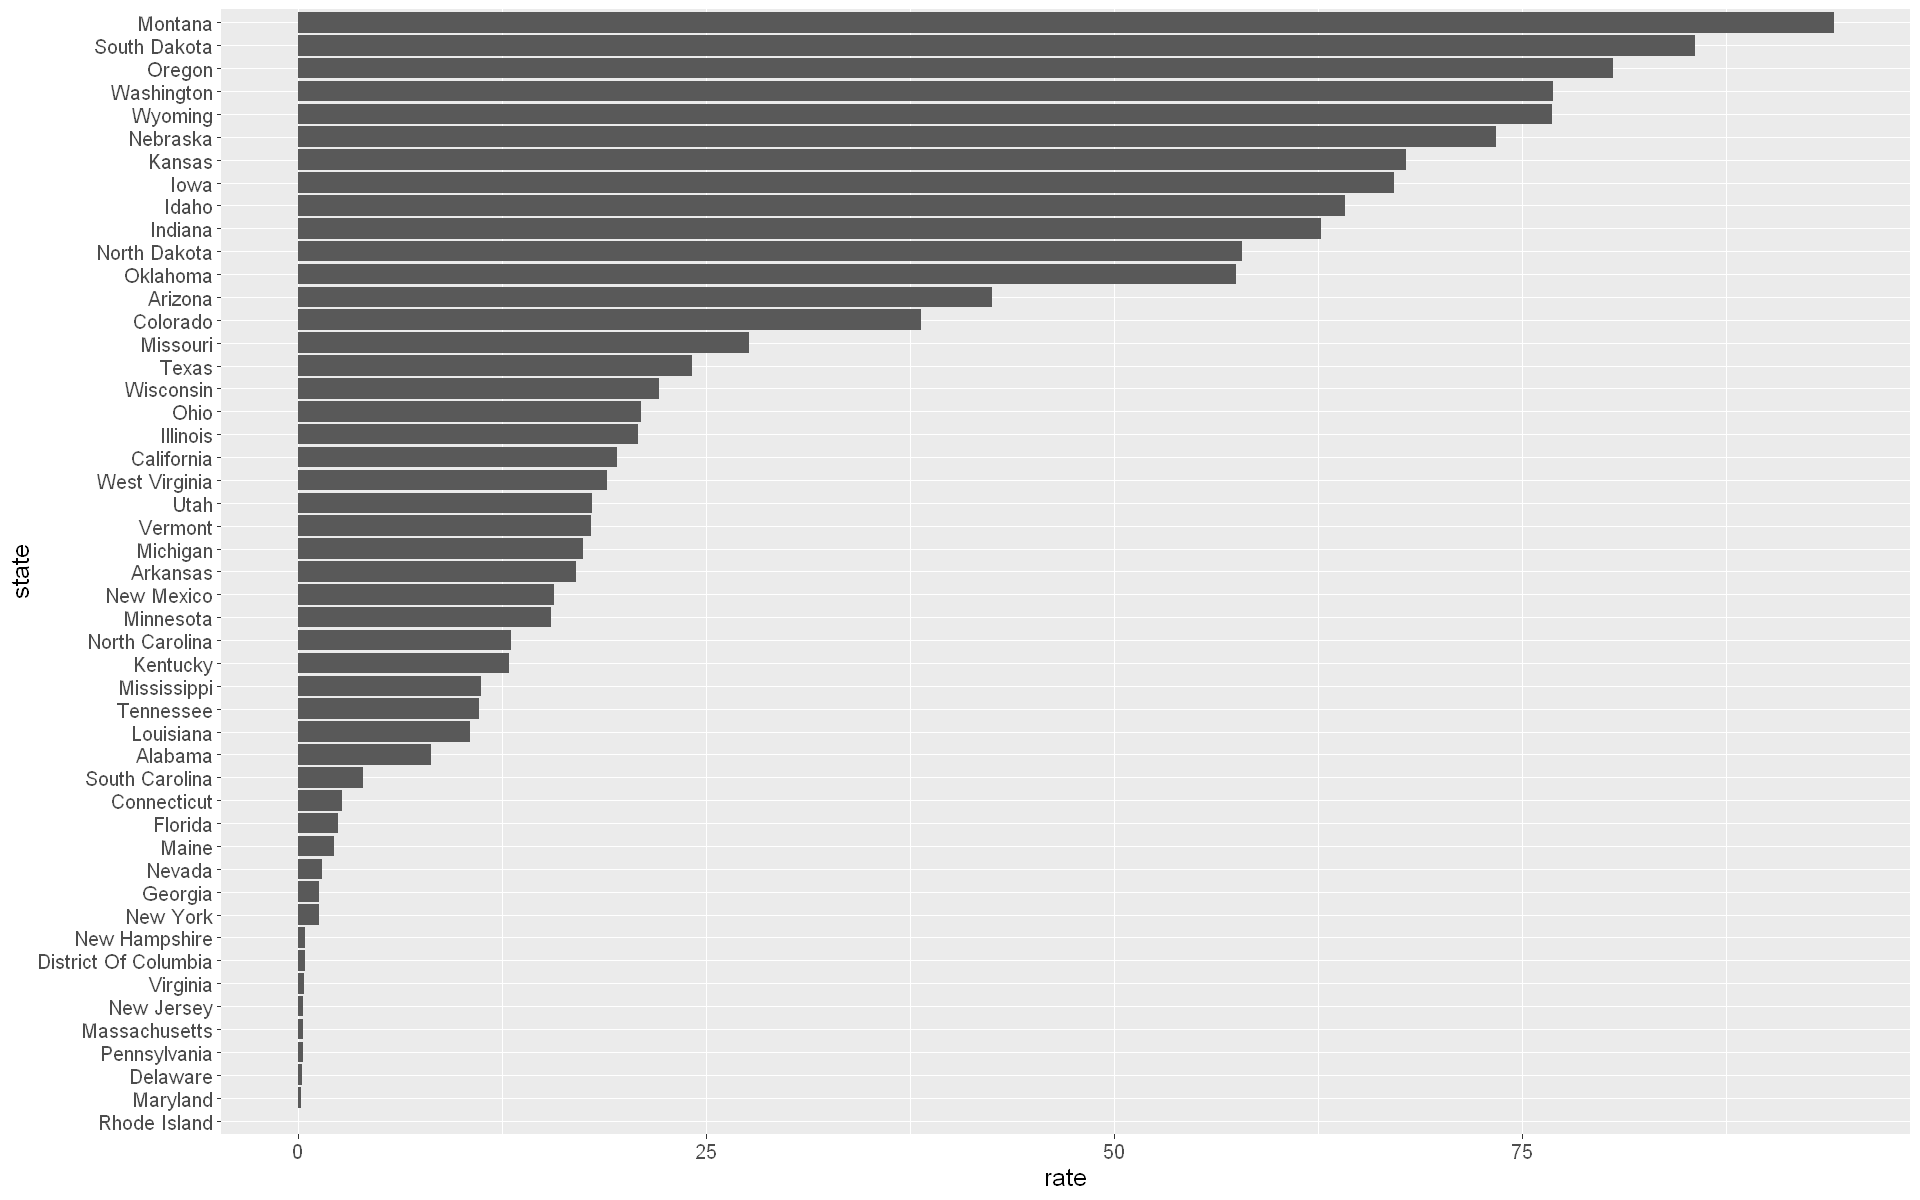

In [174]:
dat <- us_contagious_diseases %>% 
    filter(disease == "Smallpox"& weeks_reporting > 10 & !state %in% c("Hawaii", "Alaska")) %>%
    mutate(rate = count/population*10000*52/weeks_reporting) %>%
    mutate(state = reorder(state, rate, FUN = sum))

dat %>% ggplot(aes(state, rate)) +
    geom_bar(stat="identity")+
    coord_flip() +
    theme(text = element_text(size = 15))

2. Now reproduce the time series plot we previously made, but this time following the instructions of the previous question for smallpox.

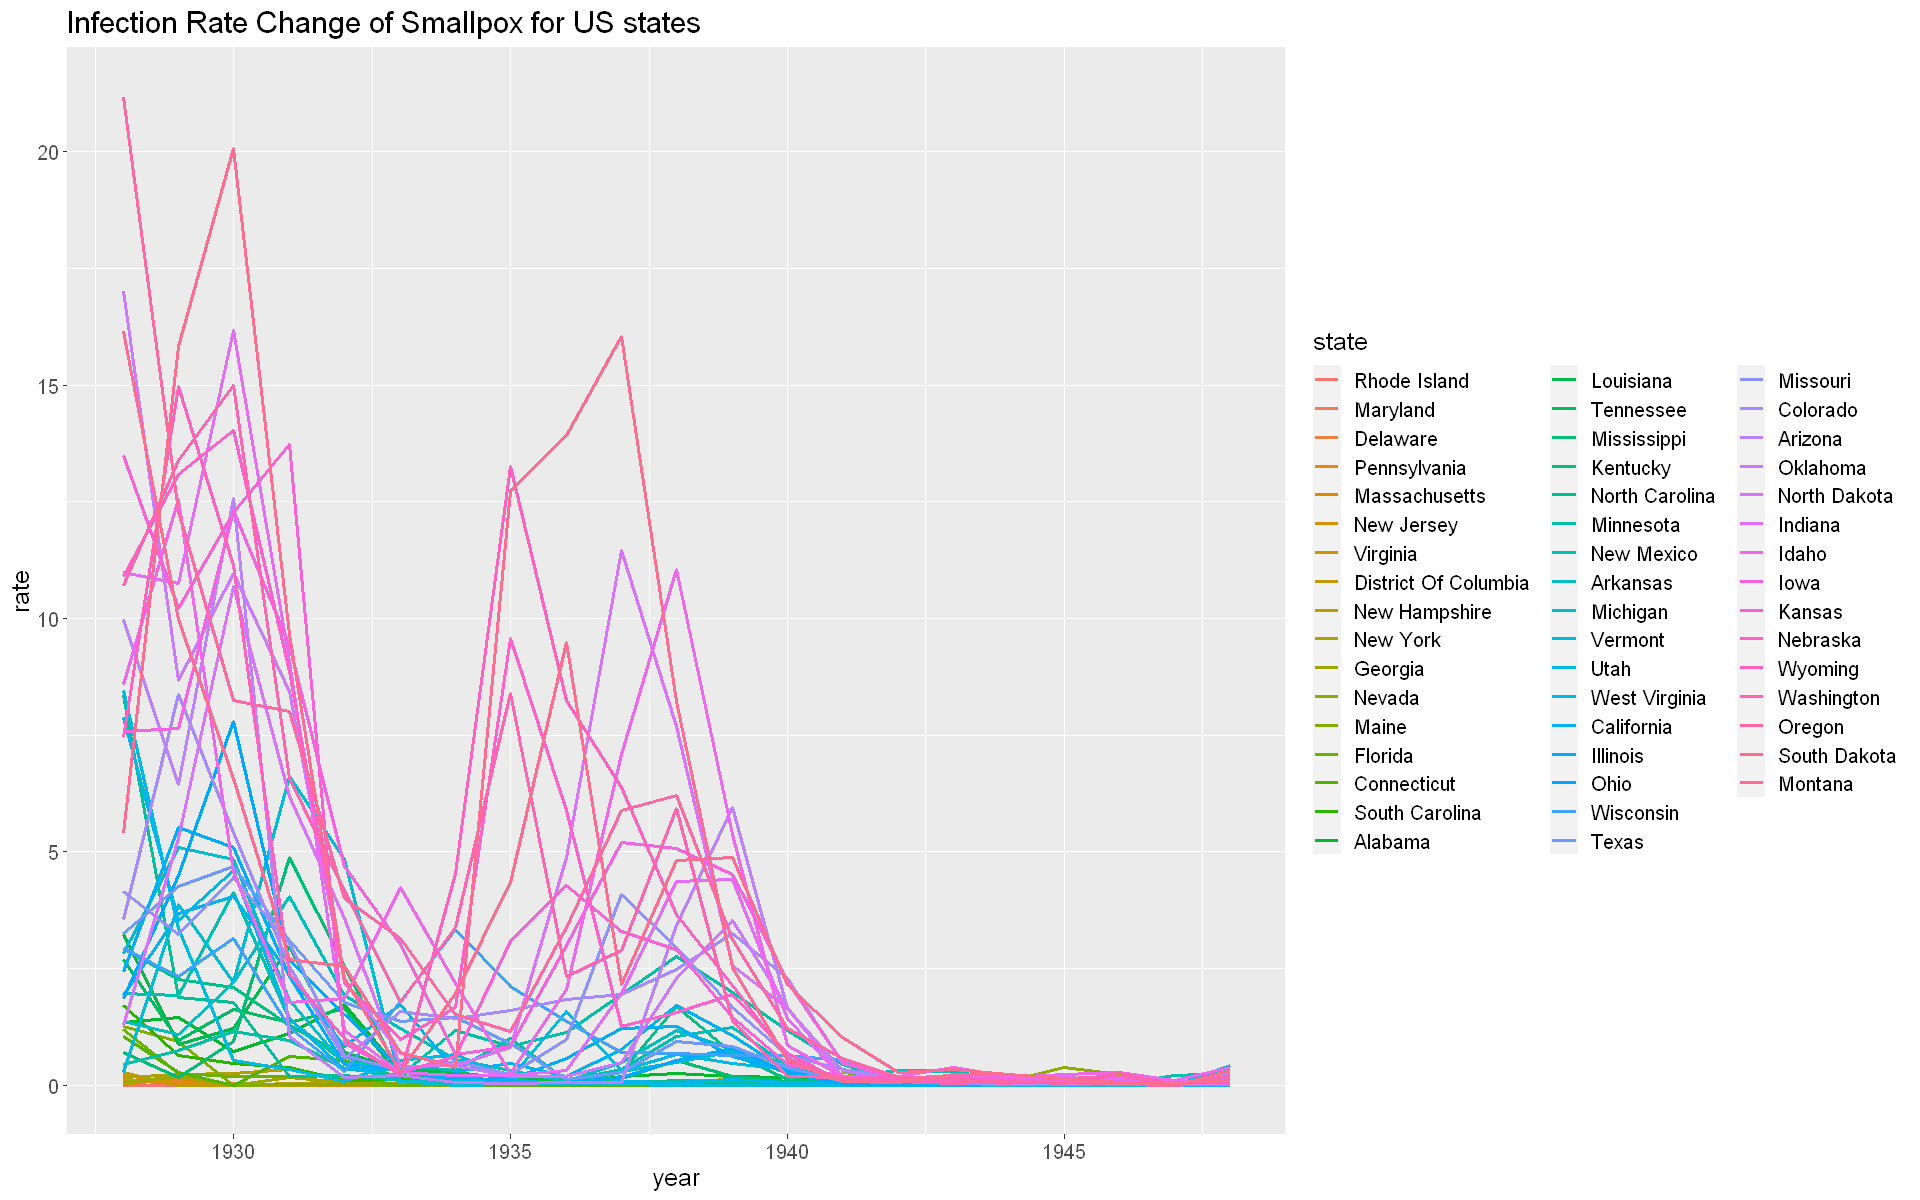

In [184]:
dat %>% ggplot(aes(year, rate, color = state)) +
    geom_line(lwd = 1) +
    ggtitle("Infection Rate Change of Smallpox for US states") +
    theme(text = element_text(size = 15))

3. For the state of California, make a time series plot showing rates for all diseases. Include only years with 10 or more weeks reporting. Use a different color for each disease.

Warning message:
"Removed 3 row(s) containing missing values (geom_path)."


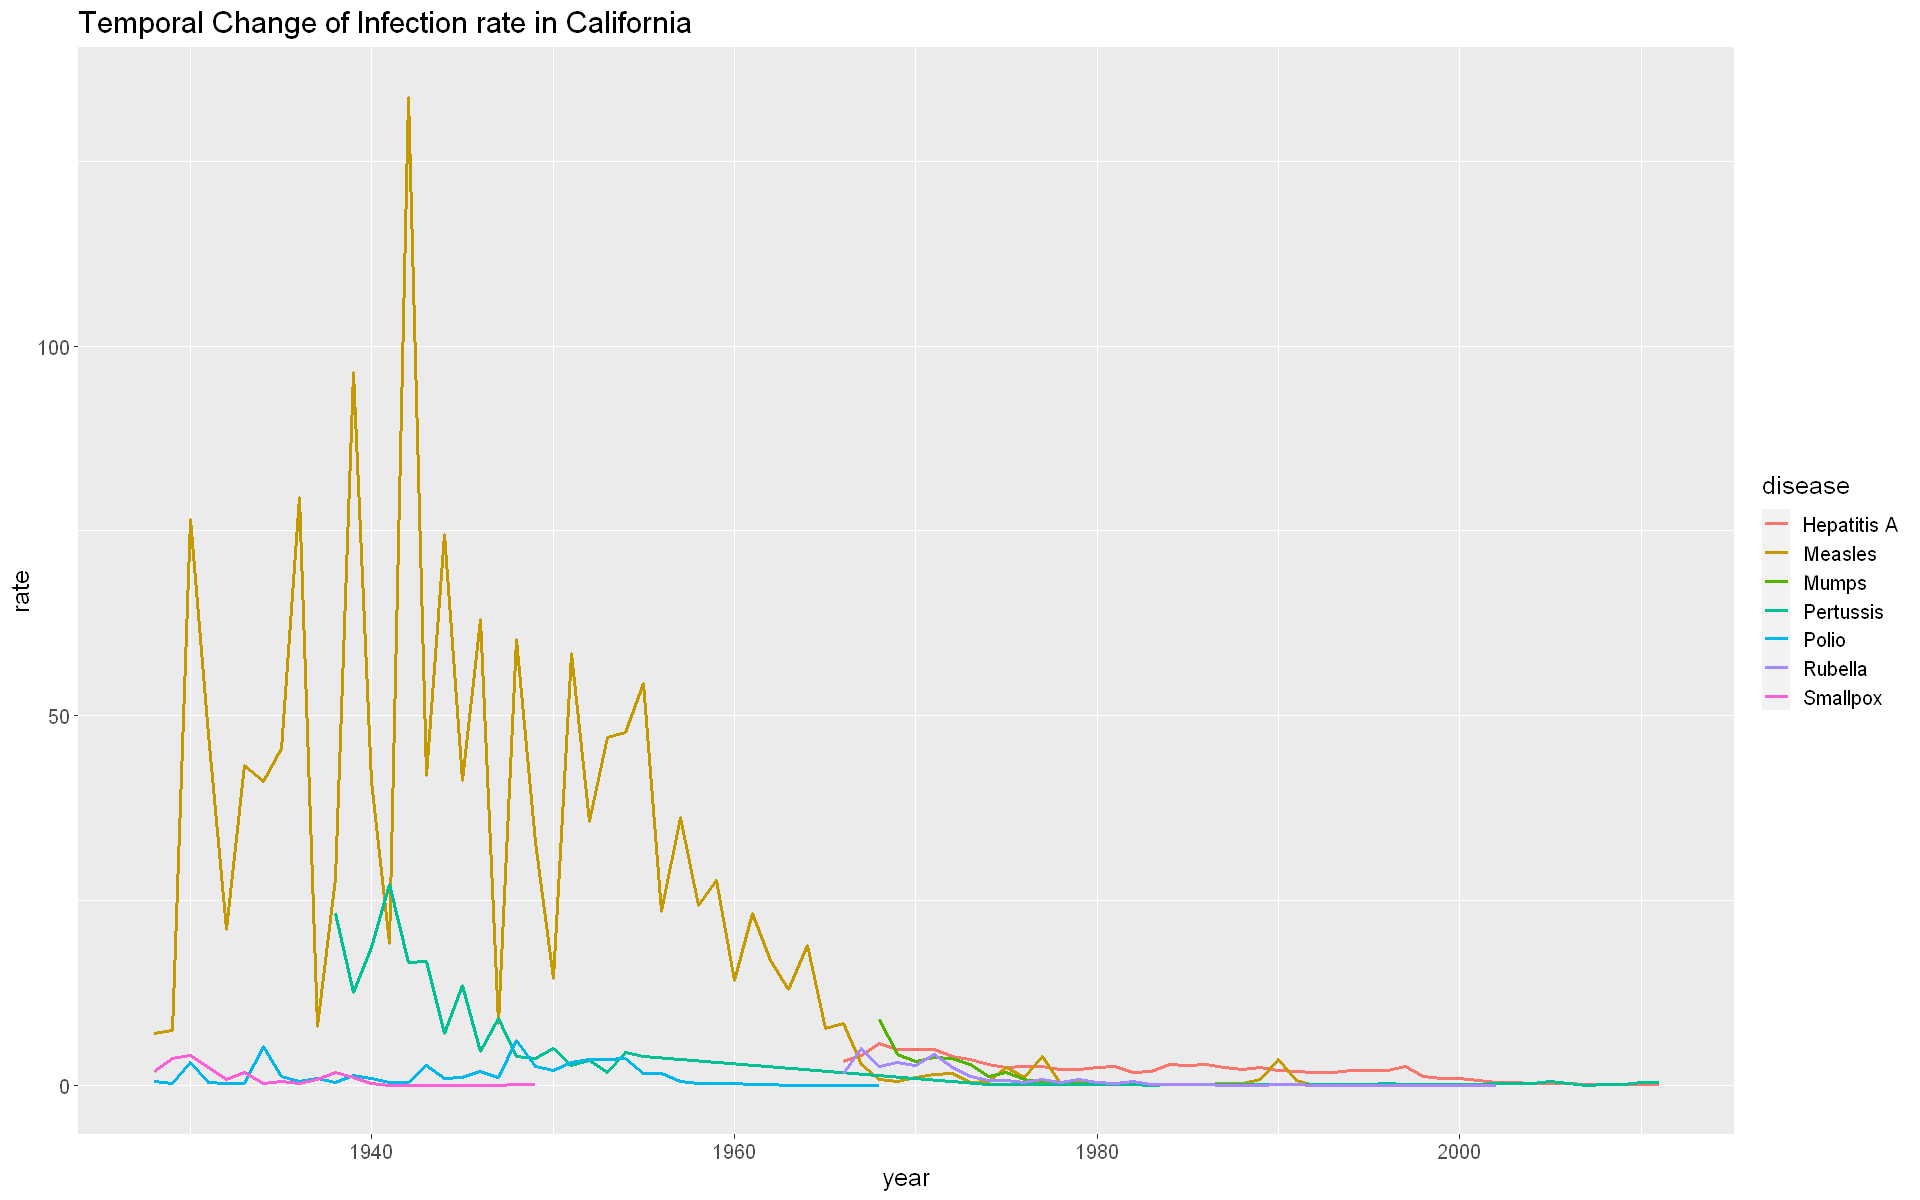

In [192]:
dat2 <- us_contagious_diseases %>% filter(state == "California", !is.na(population)) %>%
    mutate(rate = count/population*10000*52/weeks_reporting) 
dat2 %>% ggplot(aes(year, rate, color = disease)) +
    geom_line(lwd = 1) +
    ggtitle("Temporal Change of Infection rate in California") +
    theme(text = element_text(size = 15)) 
    

4. Now do the same for the rates for the US. Hint: compute the US rate by using summarize: the total divided by total population.

`summarise()` regrouping output by 'year' (override with `.groups` argument)



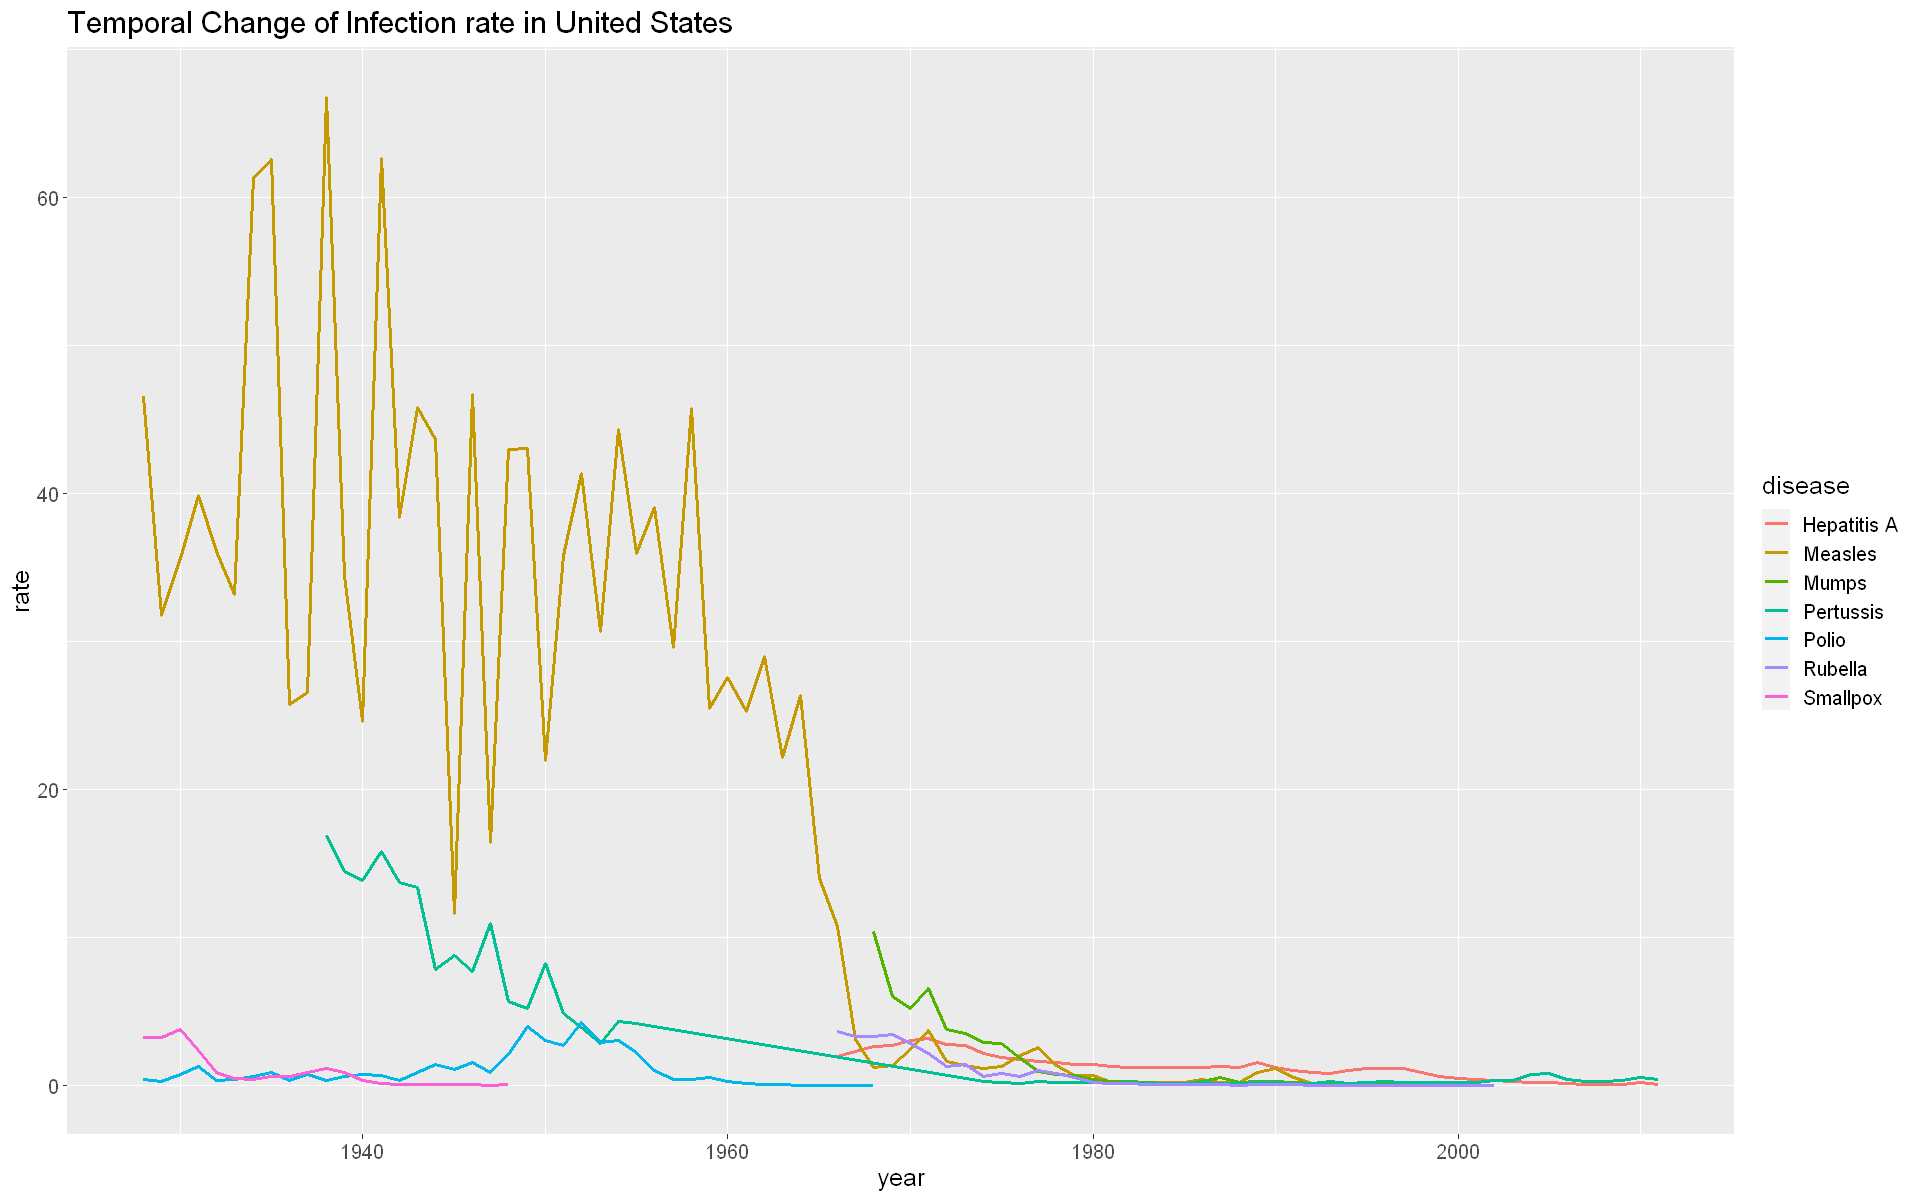

In [193]:
dat3 <- us_contagious_diseases %>%
    filter(weeks_reporting >= 10 & !is.na(population)) %>%
    group_by(year,disease) %>%
    summarize(count = sum(count), population = sum(population), 
              weeks_reporting_mean = mean(weeks_reporting)) %>%
    mutate(rate = count / population *52 * 10000 / weeks_reporting_mean)
 
dat3 %>% ggplot(aes(year, rate, color = disease)) +
    geom_line(lwd = 1) +
    ggtitle("Temporal Change of Infection rate in United States") +
    theme(text = element_text(size = 15))
    